In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [79]:
# Configurar pandas para mostrar todas las filas y columnas
pd.set_option("display.max_rows", None)  # Muestra todas las filas
pd.set_option("display.max_columns", None)  # Muestra todas las columnas

In [80]:
df = pd.read_csv("Dataset_Completo.csv")

In [81]:
#Realizamos un primer vistazo a la base de datos
print(df.head(5))

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0       

In [82]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB
None


In [83]:
#Usamos describe para obtener una idea general del dataset
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.0,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000
mean,0.138049,0.160016,0.021967,0.045143,0.021967,0.162233,0.139057,0.045143,0.045143,0.021967,0.021967,0.389158,0.043934,0.021967,0.392785,0.023176,0.023176,0.023176,0.046352,0.092705,0.046352,0.092705,0.021967,0.023176,0.114672,0.276904,0.021967,0.091495,0.137848,0.021967,0.045143,0.230552,0.185409,0.115881,0.232971,0.234180,0.024385,0.046352,0.046352,0.209794,0.1

In [84]:
#Seleccionar todas las columnas binarias
columnas_binarias = df.iloc[:, :-1]

#Compprobar si solo contienen 0 o 1
es_binario = (columnas_binarias.isin([0,1])).all().all()

#Imprimimos el resultado
print(es_binario)

True


In [85]:
#Comprobamos si hay valores nulos
print(df.isnull().values.any())

False


In [86]:
#Calculamos el número de filas duplicadas
print(df.duplicated().sum())

4657


Vemos que la mayoría de los individuos están repetidos, pues individuos únicos son 305. Esto es normal en una base de datos de pacientes puesto que es muy probable que si varios pacientes presentan una cierta enfermedad, sus síntomas sean muy parecidos.

In [87]:
#Individuos únicos
n_individuos_unicos = df.shape[0] - df.duplicated().sum()
print(n_individuos_unicos)

305


In [88]:
#Creamos un nuevo dataset con las filas duplicadas y los grupos a los que pertenecen
duplicados_grupos = df[df.duplicated(keep=False)].copy()
duplicados_grupos["grupo_duplicado"] = df.groupby(list(df.columns)).ngroup()


In [89]:
#Estudio de frecuencias por grupos duplicados y por enfermedad
frecuencia_grupos = duplicados_grupos.groupby(["grupo_duplicado","prognosis"]).size().reset_index(name="frecuencia").sort_values("frecuencia", ascending=False)

print("---Enfermedades que contienen grupos duplicados con más de 60 individuos---\n")

#Filtramos para obtener los grupos que tienen más de 60 pacientes
frecuencia_grupos_mas60 = frecuencia_grupos[frecuencia_grupos["frecuencia"] > 60]

#Reseteamos el índice
frecuencia_grupos_mas60 = frecuencia_grupos_mas60.reset_index(drop=True)

#Reiniciamos el índice de 1 a 41
frecuencia_grupos_mas60.index = range(1, len(frecuencia_grupos_mas60) + 1)

#Quitamos el número de grupo duplicado que no es necesario
frecuencia_grupos_mas60 = frecuencia_grupos_mas60.drop(columns="grupo_duplicado")

print(frecuencia_grupos_mas60)

---Enfermedades que contienen grupos duplicados con más de 60 individuos---

                                  prognosis  frecuencia
1              Dimorphic hemmorhoids(piles)          91
2                                 Arthritis          91
3                           Osteoarthristis          85
4                                 Psoriasis          85
5                                      Acne          79
6                                  Impetigo          79
7                       Chronic cholestasis          79
8                      Cervical spondylosis          79
9                       Alcoholic hepatitis          79
10                          Gastroenteritis          79
11             Paralysis (brain hemorrhage)          79
12                             Heart attack          79
13                              Hepatitis C          79
14                                     AIDS          79
15                  Urinary tract infection          79
16  (vertigo) Paroymsal  Po

Si comprobamos la tabla de la parte superior, encontramos que la mayoría de enfermedades poseen grupos de individuos duplicados mayores con una frecuencia muy alta. En el primer caso podemos comprobar coo las hemorroides dimórficas presentan un grupo con una frecuencia de individuos repetidos de 91 pacientes.

In [90]:
#Estudio del número de grupos de individuos idénticos que contiene cada enfermedad
grupos_por_enfermedad = duplicados_grupos.groupby("prognosis")["grupo_duplicado"].nunique().reset_index()

grupos_por_enfermedad.columns = ["prognosis", "num_grupos_duplicados"]


print(grupos_por_enfermedad.sort_values("num_grupos_duplicados", ascending=False).reset_index(drop=True))

grupos_por_enfermedad.to_clipboard(excel=True)

                                  prognosis  num_grupos_duplicados
0                               Chicken pox                     10
1                               Hepatitis D                     10
2                                  Migraine                     10
3                                    Dengue                     10
4                               Common Cold                      9
5                                 Diabetes                       9
6                               Hepatitis B                      9
7                               Hepatitis E                      9
8                           Hyperthyroidism                      9
9                                 Pneumonia                      9
10                             Tuberculosis                      9
11                              hepatitis A                      9
12                                  Typhoid                      9
13                             Hypoglycemia                   

En la tabla de la parte superior se muestra la frecuencia por grupos de 
individuos duplicados distintos. Esto quiere decir que para el ejemplo del
dengue tenemos 10 grupos de individuos duplicados, cada grupo presentando 
sintomatología distinta.

In [91]:
import pandas as pd

def obtener_frecuencias_variable_respuesta(df, columna_respuesta):
    """
    Muestra las frecuencias absolutas y relativas de los valores de la variable respuesta.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - columna_respuesta: nombre de la columna con la variable respuesta (string).
    
    Devuelve:
    - Un DataFrame con las frecuencias.
    """
    frecuencias_absolutas = df[columna_respuesta].value_counts().sort_values(ascending=False)
    frecuencias_relativas = df[columna_respuesta].value_counts(normalize=True).sort_values(ascending=False)

    tabla_frecuencias = pd.DataFrame({
        'Frecuencia Absoluta': frecuencias_absolutas,
        'Frecuencia Relativa (%)': (frecuencias_relativas * 100).round(2)
    })

    return tabla_frecuencias

tabla = obtener_frecuencias_variable_respuesta(df, 'prognosis')  # Ajusta 'prognosis' al nombre real de la columna
print(tabla)


                                         Frecuencia Absoluta  \
prognosis                                                      
Fungal infection                                         122   
Allergy                                                  121   
GERD                                                     121   
Chronic cholestasis                                      121   
Drug Reaction                                            121   
Peptic ulcer diseae                                      121   
AIDS                                                     121   
Diabetes                                                 121   
Gastroenteritis                                          121   
Bronchial Asthma                                         121   
Hypertension                                             121   
Migraine                                                 121   
Cervical spondylosis                                     121   
Paralysis (brain hemorrhage)            

En la tabla de la parte superior podemos comprobar que la frecuencia para todas las enfermedades es la misma.

In [92]:
# Cálculo del ratio de individuos duplicados entre grupos de individuos duplicados por enfermedad
grupos_por_enfermedad = duplicados_grupos.groupby("prognosis")["grupo_duplicado"].nunique().reset_index()
grupos_por_enfermedad.columns = ["prognosis", "num_grupos_duplicados"]

# Calcular el número total de individuos duplicados por enfermedad (usando el índice como identificador)
num_individuos_duplicados = duplicados_grupos[duplicados_grupos.duplicated(keep='first')].groupby("prognosis").apply(lambda x: x.index.nunique()).reset_index(name="num_individuos_duplicados")

# Unir ambas tablas en base a "prognosis"
ratio_df = grupos_por_enfermedad.merge(num_individuos_duplicados, on="prognosis")

# Calcular el ratio
ratio_df["ratio_individuos_grupos"] = ratio_df["num_individuos_duplicados"] / ratio_df["num_grupos_duplicados"]

ratio_df["ratio_individuos_grupos"] = ratio_df["ratio_individuos_grupos"].round(2)

# Ordenar de mayor a menor según el ratio
#ratio_df = ratio_df.sort_values("ratio_individuos_grupos", ascending=False).reset_index(drop=True)


print(ratio_df)


                                  prognosis  num_grupos_duplicados  \
0   (vertigo) Paroymsal  Positional Vertigo                      7   
1                                      AIDS                      5   
2                                      Acne                      5   
3                       Alcoholic hepatitis                      8   
4                                   Allergy                      5   
5                                 Arthritis                      6   
6                          Bronchial Asthma                      7   
7                      Cervical spondylosis                      6   
8                               Chicken pox                     10   
9                       Chronic cholestasis                      8   
10                              Common Cold                      9   
11                                   Dengue                     10   
12                                Diabetes                       9   
13             Dimor

C:\Users\andre\AppData\Local\Temp\ipykernel_11292\1514040181.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  num_individuos_duplicados = duplicados_grupos[duplicados_grupos.duplicated(keep='first')].groupby("prognosis").apply(lambda x: x.index.nunique()).reset_index(name="num_individuos_duplicados")


Ahora de cada enfermedad, estudiamos el ratio de individuos por grupos,
teniendo en cuenta el número de grupos y el número de individuos duplicados por cada enfermedad. Podemos ver que el valor más alto se alcanza cuando el ratio de individuos es de 23.20 individuos por grupo duplicado.

In [93]:
#Vamos a mostrar el número de grupos de individuos duplicados
duplicados_grupos["grupo_duplicado"].nunique()

304

In [94]:
#Contamos el número de unos de cada variable para comprobar las más frecuentes
numero_unos = df.iloc[:, :-1].sum().sort_values(ascending = False)

#Ahora convertimos a data frame y copiamos al portapapeles
enfermedades_mas_frecuentes = pd.DataFrame(data=numero_unos.head(10), columns=["frecuencia"])

print(enfermedades_mas_frecuentes)

enfermedades_mas_frecuentes.to_clipboard(excel=True)

                   frecuencia
fatigue                  1949
vomiting                 1931
high_fever               1374
loss_of_appetite         1162
nausea                   1156
headache                 1144
abdominal_pain           1041
yellowish_skin            920
yellowing_of_eyes         823
chills                    805


Entre las variables (síntomas) que más se repiten, tenemos la fatiga, vómitos o la fiebre alta. Es algo previsible, ya que son síntomas bastante frecuentes en etapas inciales de cualquier enfermedad, lo cual explica que se repitan tanto.

In [95]:
#ahora con los síntomas menos frecuentes
enfermedades_menos_frecuentes = pd.DataFrame(data=numero_unos.tail(10), columns=["frecuencia"])

print(enfermedades_menos_frecuentes)

enfermedades_menos_frecuentes.to_clipboard(excel=True)

                           frecuencia
extra_marital_contacts            109
swollen_blood_vessels             109
blackheads                        109
weakness_of_one_body_side         109
spinning_movements                109
dischromic _patches               109
scurring                          109
pus_filled_pimples                109
foul_smell_of urine               103
fluid_overload                      0


también comprobamos que entre los síntomas menos frecuentes encontramos la hipervolemia (fluid_overfload) que no presenta ningún paciente. A este síntoma le siguen el mal olor de la orina, la debilidad en una parte del cuerpo o los movimientos giratorios (asociados a vértigos). 

In [96]:
#Breve prueba sobre las variables menos frecuentes y los individuos que presentan esos síntomas
df[df["foul_smell_of urine"] == 1]["prognosis"].unique()

array(['Urinary tract infection'], dtype=object)

En este caso realizamos una prueba en la que buscamos la enfermedad asociada a uno de los síntomas que presenta menor frecuencia. Si buscamos cual/es son las enfermedades asociadas a este síntoma, podemos comprobar que solo hay una única. Esto quiere decir que cuando aparezca el mal olor de orina en alguno de los pacientes, rápidamente sabremos que la enfermedad asociada es la infección del tracto urinario. 

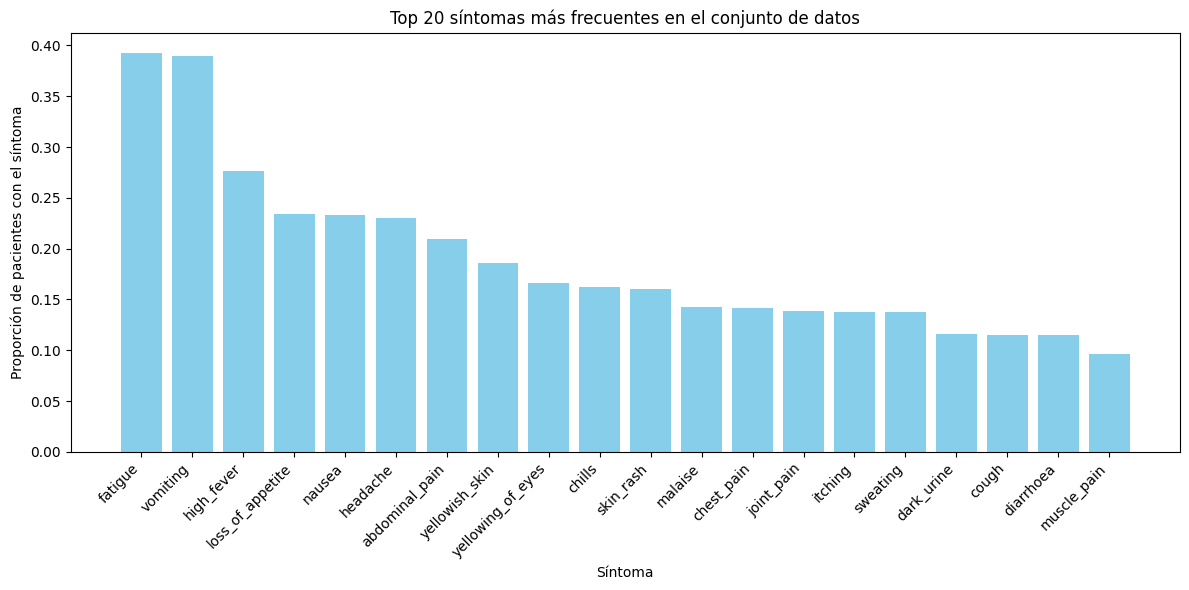

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Eliminamos la columna de enfermedad si aún está en el DataFrame
X = df.drop("prognosis", axis=1)

# Calculamos la proporción media de aparición de cada síntoma
df_lista_media = pd.DataFrame({
    "sintoma": X.columns,
    "proporcion": X.mean()
})

# Ordenamos y seleccionamos los 20 síntomas más frecuentes
df_lista_media_ordenados = df_lista_media.sort_values(by="proporcion", ascending=False).head(20)

# Representamos
plt.figure(figsize=(12, 6))
plt.bar(df_lista_media_ordenados["sintoma"], df_lista_media_ordenados["proporcion"], color="skyblue")
plt.title("Top 20 síntomas más frecuentes en el conjunto de datos")
plt.ylabel("Proporción de pacientes con el síntoma")
plt.xlabel("Síntoma")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


aquí podemos encontrar la frecuencia que presenta cada uno de los síntomas frente a la lista completa de individuos. En primer lugar los síntomas fatiga y vómitos los tienen alrededor del 40% de los pacientes. 

In [98]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Dividir el dataset en train y test

# 1) Cargar el dataset completo
df = pd.read_csv("Dataset_Completo.csv")

# 2) Detectar automáticamente la columna de respuesta
columna_respuesta = 'prognosis' if 'prognosis' in df.columns else df.columns[-1]

# 3) Dividir en train (70 %) y test (30 %), estratificando por prognosis
df_train, df_test = train_test_split(
    df,
    test_size=0.3,
    stratify=df[columna_respuesta],
    random_state=42
)

# 4) A partir de ahora, usamos SOLO el conjunto de entrenamiento para el análisis de síntomas
df = df_train.copy()

# 5) Identificar columnas de síntomas (todas menos prognosis)
columnas_sintomas = df.columns[df.columns != columna_respuesta]

# 6) Codificar la variable respuesta para mutual information
y_codificada, enfermedades = pd.factorize(df[columna_respuesta])

# 7) Analizar cada síntoma
resultados = []
for sintoma in columnas_sintomas:
    tabla = pd.crosstab(df[sintoma], df[columna_respuesta])
    chi2, p_valor, dof, expected = chi2_contingency(tabla, lambda_="log-likelihood")
    celdas_bajas = (expected < 5).sum()
    mi = mutual_info_classif(df[[sintoma]], y_codificada, discrete_features=True)[0]
    resultados.append({
        'Síntoma': sintoma,
        'p-valor Chi²': round(p_valor, 6),
        'Celdas esperadas <5': celdas_bajas,
        'Información Mutua': round(mi, 5)
    })

# 8) Crear y ordenar la tabla de resultados
tabla_resultados = pd.DataFrame(resultados).sort_values(by='p-valor Chi²')

# 9) Mostrar los 10 síntomas más significativos
print(tabla_resultados.head(10))

# 10) Normalizar para combinar p-valor e información mutua
tabla_norm = tabla_resultados.copy()
tabla_norm['p_norm'] = (
    tabla_norm['p-valor Chi²'] - tabla_norm['p-valor Chi²'].min()
) / (
    tabla_norm['p-valor Chi²'].max() - tabla_norm['p-valor Chi²'].min()
)
tabla_norm['mi_norm'] = (
    tabla_norm['Información Mutua'] - tabla_norm['Información Mutua'].min()
) / (
    tabla_norm['Información Mutua'].max() - tabla_norm['Información Mutua'].min()
)
tabla_norm['criterio_combinado'] = (1 - tabla_norm['p_norm']) + tabla_norm['mi_norm']


                Síntoma  p-valor Chi²  Celdas esperadas <5  Información Mutua
0               itching           0.0                    0            0.37220
1             skin_rash           0.0                    0            0.39369
2  nodal_skin_eruptions           0.0                   41            0.09532
3   continuous_sneezing           0.0                   41            0.17173
4             shivering           0.0                   41            0.09532
5                chills           0.0                    0            0.41419
6            joint_pain           0.0                    0            0.37254
7          stomach_pain           0.0                   41            0.17039
8               acidity           0.0                   41            0.17753
9      ulcers_on_tongue           0.0                   41            0.09365


In [99]:
# Seleccionar los 20 mejores síntomas
top_20 = tabla_norm.sort_values(by='criterio_combinado', ascending=False).head(20)

# Mostrar tabla con solo las columnas relevantes
print(top_20[['Síntoma', 'p-valor Chi²', 'Celdas esperadas <5', 'Información Mutua']])

#Exportar a excel
top_20.to_clipboard()

              Síntoma  p-valor Chi²  Celdas esperadas <5  Información Mutua
14            fatigue           0.0                    0            0.59401
11           vomiting           0.0                    0            0.57322
25         high_fever           0.0                    0            0.53266
35   loss_of_appetite           0.0                    0            0.51049
34             nausea           0.0                    0            0.49869
31           headache           0.0                    0            0.49490
39     abdominal_pain           0.0                    0            0.47698
32     yellowish_skin           0.0                    0            0.43417
43  yellowing_of_eyes           0.0                    0            0.42888
5              chills           0.0                    0            0.41419
48            malaise           0.0                    0            0.39703
1           skin_rash           0.0                    0            0.39369
56         c

Seleccionamos los 20 síntomas más importantes en cuanto a predicción de enfermedades usando el p-valor y la información mutua.

In [100]:
from sklearn.linear_model import LogisticRegression

# — Preparar X_train e y_train a partir de df (solo entrenamiento) —
X_train = df[columnas_sintomas].values
y_train = y_codificada

# — Ajustar Regresión Logística con penalización L1 —
#    multi_class='ovr' para manejar múltiples enfermedades,
#    solver='saga' que soporta L1 y es rápido para datos escasos,
#    C controla la fuerza de la penalización (1.0 = defecto).
logreg = LogisticRegression(
    penalty='l1',
    solver='saga',
    multi_class='ovr',
    C=1.0,
    max_iter=5000,
    random_state=42
)
logreg.fit(X_train, y_train)

# — Obtener “importancia” de cada síntoma como
#    la suma de los coeficientes absolutos en todos los clasificadores one-vs-rest —
# coef_ tiene forma (n_clases, n_síntomas)
coef_abs = np.abs(logreg.coef_)
importancias = coef_abs.sum(axis=0)

# — Montar DataFrame ordenado—
df_logit_imp = pd.DataFrame({
    'Síntoma': columnas_sintomas,
    'Importancia (L1)': importancias
}).sort_values('Importancia (L1)', ascending=False)

# — Mostrar los 10 síntomas más relevantes según L1—
print(df_logit_imp.head(20))


C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


                  Síntoma  Importancia (L1)
0                 itching         14.959820
14                fatigue         12.730857
97            muscle_pain         12.708376
36   pain_behind_the_eyes         12.537228
108          rusty_sputum         12.536503
118       blood_in_sputum         12.519389
11               vomiting         11.953070
33             dark_urine         11.511376
25             high_fever         10.752723
34                 nausea         10.224352
56             chest_pain          9.697261
114      stomach_bleeding          9.508180
113                  coma          9.508180
39         abdominal_pain          9.445842
6              joint_pain          9.080094
40              diarrhoea          8.778944
98      altered_sensorium          8.640790
41             mild_fever          8.245500
28               sweating          8.211355
7            stomach_pain          8.093724


Sintomas más importantes según la regresión logística multinomial

In [101]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# — Preparar X_train e y_train a partir de df (solo entrenamiento) —
X_train = df[columnas_sintomas].values
y_train = y_codificada

# — Ajustar Random Forest —
#    n_estimators: número de árboles
#    max_features='sqrt': submuestra de √d características por división
#    random_state para reproducibilidad
rf = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',
    bootstrap=True,
    criterion='gini',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# — Obtener importancia de cada síntoma —
# feature_importances_ es un array de longitud n_síntomas
importancias_rf = rf.feature_importances_

# — Montar DataFrame ordenado —
df_rf_imp = pd.DataFrame({
    'Síntoma': columnas_sintomas,
    'Importancia (RF)': importancias_rf
}).sort_values('Importancia (RF)', ascending=False)

# — Mostrar los 20 síntomas más relevantes según Random Forest —
print(df_rf_imp.head(20))


               Síntoma  Importancia (RF)
97         muscle_pain          0.017958
25          high_fever          0.016849
0              itching          0.016831
98   altered_sensorium          0.015538
41          mild_fever          0.015095
39      abdominal_pain          0.014947
35    loss_of_appetite          0.014567
106     family_history          0.014283
33          dark_urine          0.013883
14             fatigue          0.013855
56          chest_pain          0.013354
34              nausea          0.013063
63           neck_pain          0.012497
11            vomiting          0.012294
19         weight_loss          0.012061
27      breathlessness          0.012019
40           diarrhoea          0.011819
108       rusty_sputum          0.011749
28            sweating          0.011610
24               cough          0.011478


Síntomas más importantes usando el modelo random forest

In [102]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

# — Preparar X_train e y_train a partir de df (solo entrenamiento) —
X_train = df[columnas_sintomas].values
y_train = y_codificada

# — Ajustar Árbol de Decisión —
#    criterion='gini' mide la impureza en cada partición,
#    max_depth=None deja crecer el árbol hasta pureza o min_samples,
#    random_state para reproducibilidad.
dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
dt.fit(X_train, y_train)

# — Obtener importancia de cada síntoma —
# feature_importances_ es un array de longitud n_síntomas
importancias_dt = dt.feature_importances_

# — Montar DataFrame ordenado —
df_dt_imp = pd.DataFrame({
    'Síntoma': columnas_sintomas,
    'Importancia (DT)': importancias_dt
}).sort_values('Importancia (DT)', ascending=False)

# — Mostrar los 20 síntomas más relevantes según el Árbol de Decisión —
print(df_dt_imp.head(20))


                Síntoma  Importancia (DT)
14              fatigue          0.159956
11             vomiting          0.094410
35     loss_of_appetite          0.068822
25           high_fever          0.061109
1             skin_rash          0.054040
39       abdominal_pain          0.041459
31             headache          0.039233
56           chest_pain          0.035304
43    yellowing_of_eyes          0.032850
121     painful_walking          0.030975
48              malaise          0.030647
85      loss_of_balance          0.028034
96         irritability          0.025880
0               itching          0.022606
97          muscle_pain          0.020022
63            neck_pain          0.015460
62   irritation_in_anus          0.014357
113                coma          0.012319
5                chills          0.012129
120        palpitations          0.011834


In [103]:
# 1) Lista de los 20 síntomas seleccionados
selected_symptoms = [
    'fatigue', 'vomiting', 'high_fever', 'abdominal_pain', 'chest_pain',
    'itching', 'muscle_pain', 'chills', 'coma', 'headache',
    'loss_of_appetite', 'malaise', 'skin_rash', 'yellowing_of_eyes',
    'dark_urine', 'diarrhoea', 'irritability', 'irritation_in_anus',
    'joint_pain', 'loss_of_balance'
]

# 2) Creamos un nuevo DataFrame sólo con esas columnas (más la variable objetivo)
df_train_selected = df_train[selected_symptoms + [columna_respuesta]].copy()

# 3) Si prefieres separar inmediatamente en X e y:
X_train_sel = df_train_selected[selected_symptoms].values
y_train_sel = df_train_selected[columna_respuesta].values

# 4) (Opcional) Si trabajas con etiquetas codificadas:
#    y_train_sel_enc = le.transform(df_train_selected[columna_respuesta])

print("Shape de df_train_selected:", df_train_selected.shape)
print("Primera fila de X_train_sel:", X_train_sel[0])


Shape de df_train_selected: (3473, 21)
Primera fila de X_train_sel: [1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0]


Obtenemos el dataframe con los síntomas más significativos de entre las cuatro técnicas utilizadas

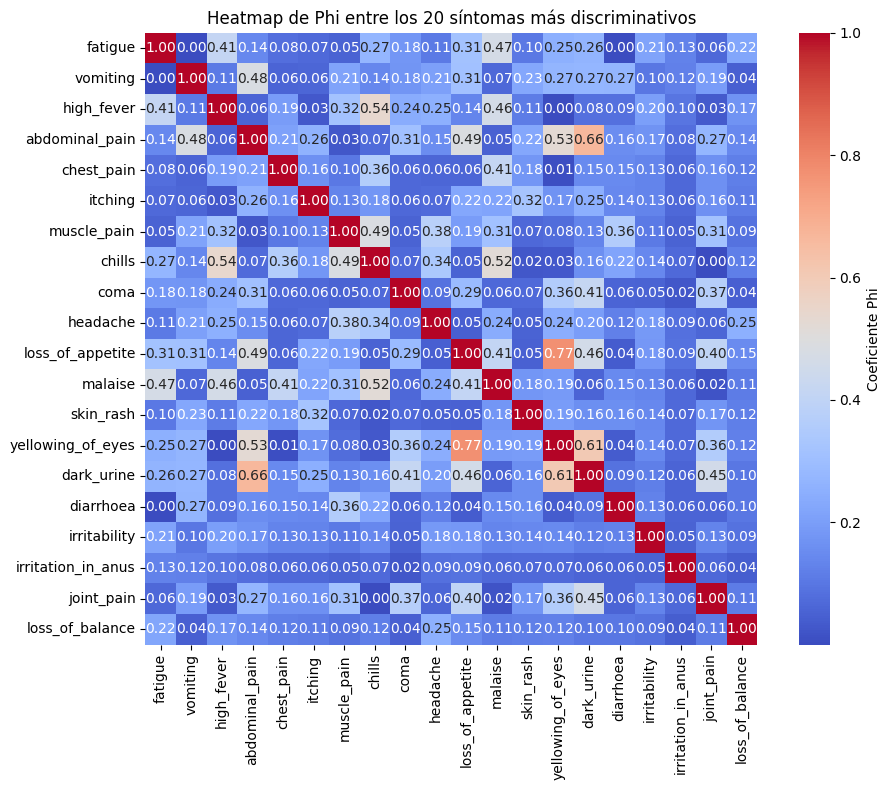

In [104]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Seleccionar los 20 síntomas más discriminativos
# top_20 = tabla_norm.sort_values(by='criterio_combinado', ascending=False).head(20)
top_20_sintomas = selected_symptoms

# Inicializar matriz vacía para coeficientes Phi
matriz_phi = pd.DataFrame(index=top_20_sintomas, columns=top_20_sintomas, dtype=float)

# Calcular coeficiente Phi para cada par de síntomas
for i in top_20_sintomas:
    for j in top_20_sintomas:
        if i == j:
            matriz_phi.loc[i, j] = 1.0
        else:
            tabla_ij = pd.crosstab(df[i], df[j])
            if tabla_ij.shape == (2, 2):
                chi2, _, _, _ = chi2_contingency(tabla_ij, correction=False)
                n = tabla_ij.to_numpy().sum()
                phi = np.sqrt(chi2 / n)
                matriz_phi.loc[i, j] = phi
            else:
                matriz_phi.loc[i, j] = np.nan

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_phi, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={'label': 'Coeficiente Phi'})
plt.title("Heatmap de Phi entre los 20 síntomas más discriminativos")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Heatmap con los coeficientes de correlación phi entre los 20 síntomas más significativos del estudio de la información mutua

In [29]:
# Crear lista con pares de síntomas y su coeficiente Phi
pares_phi = []

for i in range(len(top_20_sintomas)):
    for j in range(i + 1, len(top_20_sintomas)):
        sintoma_1 = top_20_sintomas[i]
        sintoma_2 = top_20_sintomas[j]
        phi_valor = matriz_phi.loc[sintoma_1, sintoma_2]
        if not pd.isna(phi_valor):
            pares_phi.append((sintoma_1, sintoma_2, round(phi_valor, 2)))  # Redondear a 2 decimales

# Convertir a DataFrame e incluir columna con valor absoluto
phi_top = pd.DataFrame(pares_phi, columns=['Síntoma 1', 'Síntoma 2', 'Phi'])
phi_top['AbsPhi'] = phi_top['Phi'].abs()

# Ordenar por valor absoluto de Phi para captar tanto correlaciones positivas como negativas fuertes
phi_top = phi_top.sort_values(by='AbsPhi', ascending=False).drop(columns='AbsPhi').head(20)

# Copiar al portapapeles (opcional, solo si estás en Jupyter)
phi_top.to_clipboard(index=False)

# Mostrar tabla
print(phi_top)


             Síntoma 1          Síntoma 2   Phi
147   loss_of_appetite  yellowing_of_eyes  0.77
64      abdominal_pain         dark_urine  0.66
169  yellowing_of_eyes         dark_urine  0.61
41          high_fever             chills  0.54
63      abdominal_pain  yellowing_of_eyes  0.53
115             chills            malaise  0.52
99         muscle_pain             chills  0.49
60      abdominal_pain   loss_of_appetite  0.49
20            vomiting     abdominal_pain  0.48
10             fatigue            malaise  0.47
45          high_fever            malaise  0.46
148   loss_of_appetite         dark_urine  0.46
178         dark_urine         joint_pain  0.45
1              fatigue         high_fever  0.41
129               coma         dark_urine  0.41
145   loss_of_appetite            malaise  0.41
76          chest_pain            malaise  0.41
152   loss_of_appetite         joint_pain  0.40
101        muscle_pain           headache  0.38
133               coma         joint_pai

Ahora obtenemos las relaciones más fuertes de phi entre estos 20 síntomas

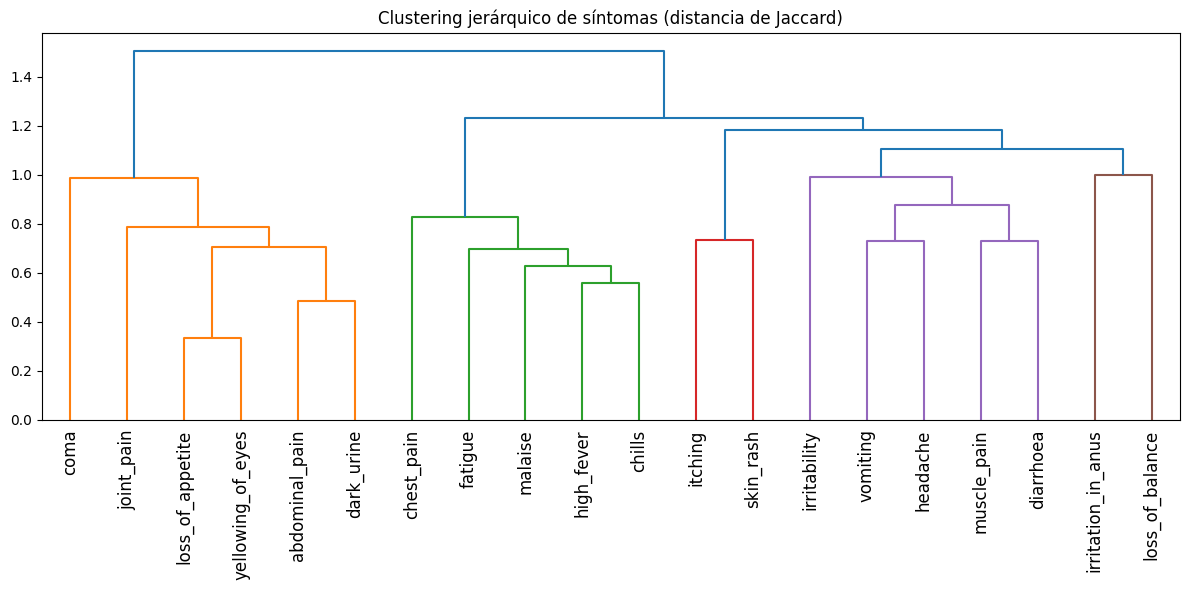

In [30]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Subconjunto del DataFrame solo con los síntomas seleccionados
df_sintomas = df[top_20_sintomas]  # Asegúrate de tener definida la lista top_sintomas

# Calcular la matriz de distancia Jaccard
distancia_jaccard = pdist(df_sintomas.T, metric='jaccard')  # .T para trabajar con síntomas (columnas)

# Matriz cuadrada de distancias (opcional si quieres ver la matriz)
matriz_distancias = pd.DataFrame(
    squareform(distancia_jaccard),
    index=top_20_sintomas,
    columns=top_20_sintomas
)

# Clustering jerárquico
Z = linkage(distancia_jaccard, method='ward')  # Puedes cambiar el método: 'ward', 'average', 'complete', etc.

# Dendrograma
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=top_20_sintomas, leaf_rotation=90)
plt.title("Clustering jerárquico de síntomas (distancia de Jaccard)")
plt.tight_layout()
plt.show()


dendograma con representación de los 20 síntomas más significativos 

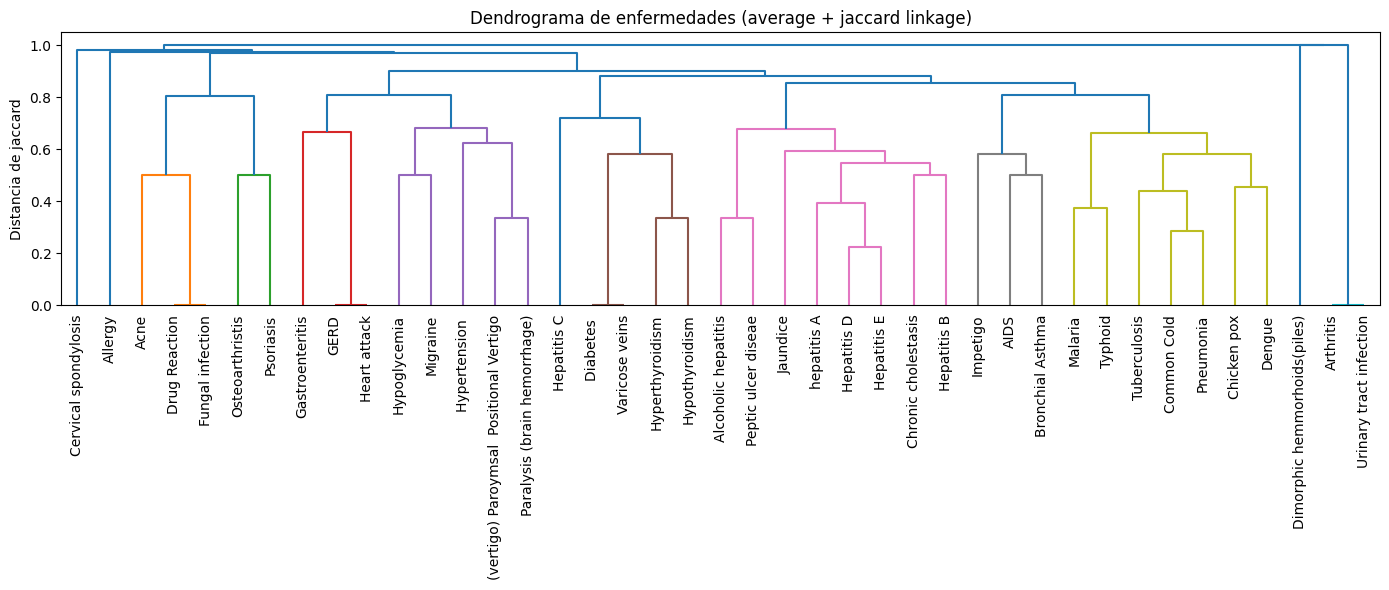

In [31]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# 1) Perfil binario por enfermedad: síntoma 'característico' si aparece en >50% de casos
col_sintomas =df_train_selected.columns[df_train_selected.columns != 'prognosis']
perfil = (df_train_selected.groupby('prognosis')[col_sintomas]
            .mean()
            .gt(0.5)         # True si prevalencia > 0.5
            .astype(int))    # 1/0 binario

# 2) Clustering con Jaccard + UPGMA
Z = linkage(perfil.values, method='average', metric='jaccard')

# 3) Dendrograma
plt.figure(figsize=(14,6))
dendrogram(
    Z,
    labels=perfil.index,
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title("Dendrograma de enfermedades (average + jaccard linkage)")
plt.ylabel("Distancia de jaccard")
plt.tight_layout()
plt.show()


Dendograma resultado del análisis de clúster que separa las enfermedades en grupos

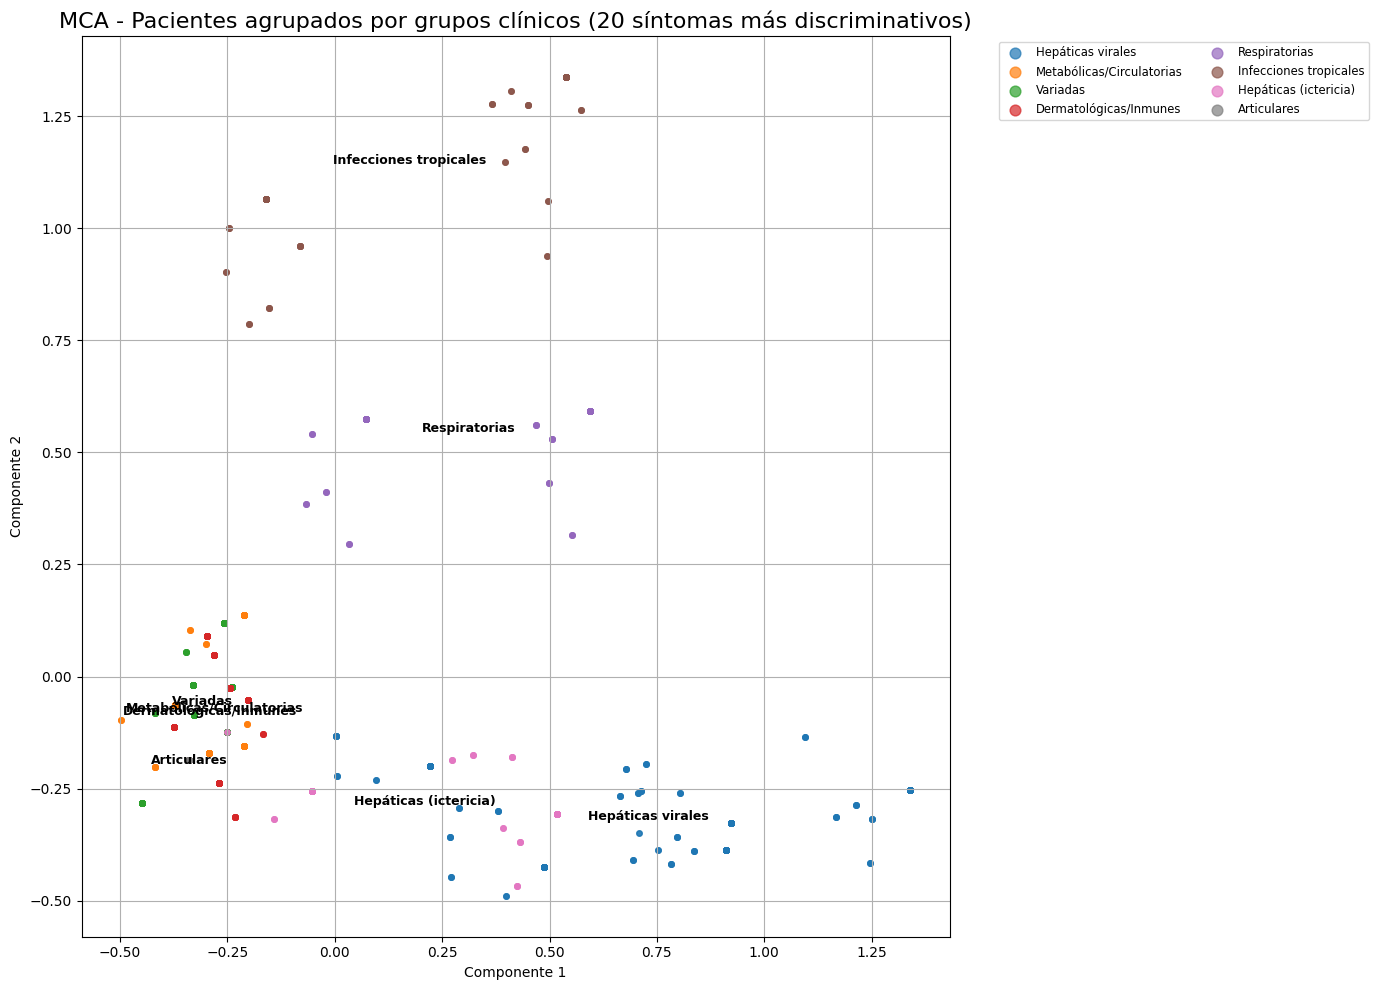

In [32]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

# 1. Seleccionamos las 20 variables más relevantes
X_reducido = df[top_20_sintomas]

# 2. Eliminamos duplicados en síntomas si quieres (opcional)
# X_reducido = X_reducido.drop_duplicates()
# df = df.loc[X_reducido.index]  # Actualizamos también el df si eliminas duplicados

# 3. Creamos el mapeo de enfermedades a grupos clínicos
mapa_enfermedades_grupos = {
    'Arthritis': 'Articulares',
    'Osteoarthritis': 'Articulares',
    'AIDS': 'Dermatológicas/Inmunes',
    'Impetigo': 'Dermatológicas/Inmunes',
    'Dimorphic hemorrhoids': 'Dermatológicas/Inmunes',
    'Psoriasis': 'Dermatológicas/Inmunes',
    'Acne': 'Dermatológicas/Inmunes',
    'Drug reaction': 'Dermatológicas/Inmunes',
    'Fungal infection': 'Dermatológicas/Inmunes',
    'Allergy': 'Dermatológicas/Inmunes',
    'Urinary tract infection': 'Dermatológicas/Inmunes',
    'Jaundice': 'Hepáticas (ictericia)',
    'Alcoholic hepatitis': 'Hepáticas (ictericia)',
    'Peptic ulcer disease': 'Hepáticas (ictericia)',
    'GERD': 'Variadas',
    'Heart attack': 'Variadas',
    'Gastroenteritis': 'Variadas',
    'Paralysis (brain hemorrhage)': 'Variadas',
    'Paroxysmal Positional Vertigo': 'Variadas',
    'Cervical spondylosis': 'Variadas',
    'Hyperthension': 'Variadas',
    'Hypothyroidism': 'Metabólicas/Circulatorias',
    'Hyperthyroidism': 'Metabólicas/Circulatorias',
    'Diabetes': 'Metabólicas/Circulatorias',
    'Hypoglycemia': 'Metabólicas/Circulatorias',
    'Varicose veins': 'Metabólicas/Circulatorias',
    'Hepatitis A': 'Hepáticas virales',
    'Hepatitis B': 'Hepáticas virales',
    'Hepatitis C': 'Hepáticas virales',
    'Hepatitis D': 'Hepáticas virales',
    'Hepatitis E': 'Hepáticas virales',
    'Chronic cholestasis': 'Hepáticas virales',
    'Malaria': 'Infecciones tropicales',
    'Dengue': 'Infecciones tropicales',
    'Thyroid': 'Infecciones tropicales',  # Asumiendo que es fiebre tifoidea (typhoid)
    'Common cold': 'Respiratorias',
    'Pneumonia': 'Respiratorias',
    'Tuberculosis': 'Respiratorias'
}

# 4. Creamos la nueva columna de grupo clínico
df['grupo_clinico'] = df['prognosis'].map(mapa_enfermedades_grupos)

# Nos quedamos sólo con filas que tienen grupo asignado (eliminamos NaN si hay)
df_grupos = df.dropna(subset=['grupo_clinico'])
X_reducido = X_reducido.loc[df_grupos.index]  # Nos aseguramos que X_reducido y df_grupos estén alineados

# 5. Aplicamos el MCA
mca = prince.MCA(
    n_components=2,
    random_state=42
)
mca = mca.fit(X_reducido)

# 6. Proyectamos las filas (pacientes)
mca_filas = mca.row_coordinates(X_reducido)
mca_filas['grupo_clinico'] = df_grupos['grupo_clinico'].values

# 7. Proyectamos las columnas (síntomas)
mca_columnas = mca.column_coordinates(X_reducido)

# =========================
# Gráfico final agrupado por grupo clínico
# =========================
plt.figure(figsize=(14, 10))

# Pintamos los pacientes agrupados por grupo clínico
for grupo in mca_filas['grupo_clinico'].unique():
    subset = mca_filas[mca_filas['grupo_clinico'] == grupo]
    plt.scatter(subset[0], subset[1], label=grupo, s=15, alpha=0.7)

# Calculamos y anotamos los centroides
for grupo in mca_filas['grupo_clinico'].unique():
    subset = mca_filas[mca_filas['grupo_clinico'] == grupo]
    x_centroide = subset[0].mean()
    y_centroide = subset[1].mean()
    plt.text(x_centroide, y_centroide, grupo, fontsize=9, weight='bold', ha='center', va='center')

plt.title('MCA - Pacientes agrupados por grupos clínicos (20 síntomas más discriminativos)', fontsize=16)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, fontsize='small')
plt.tight_layout()
plt.show()


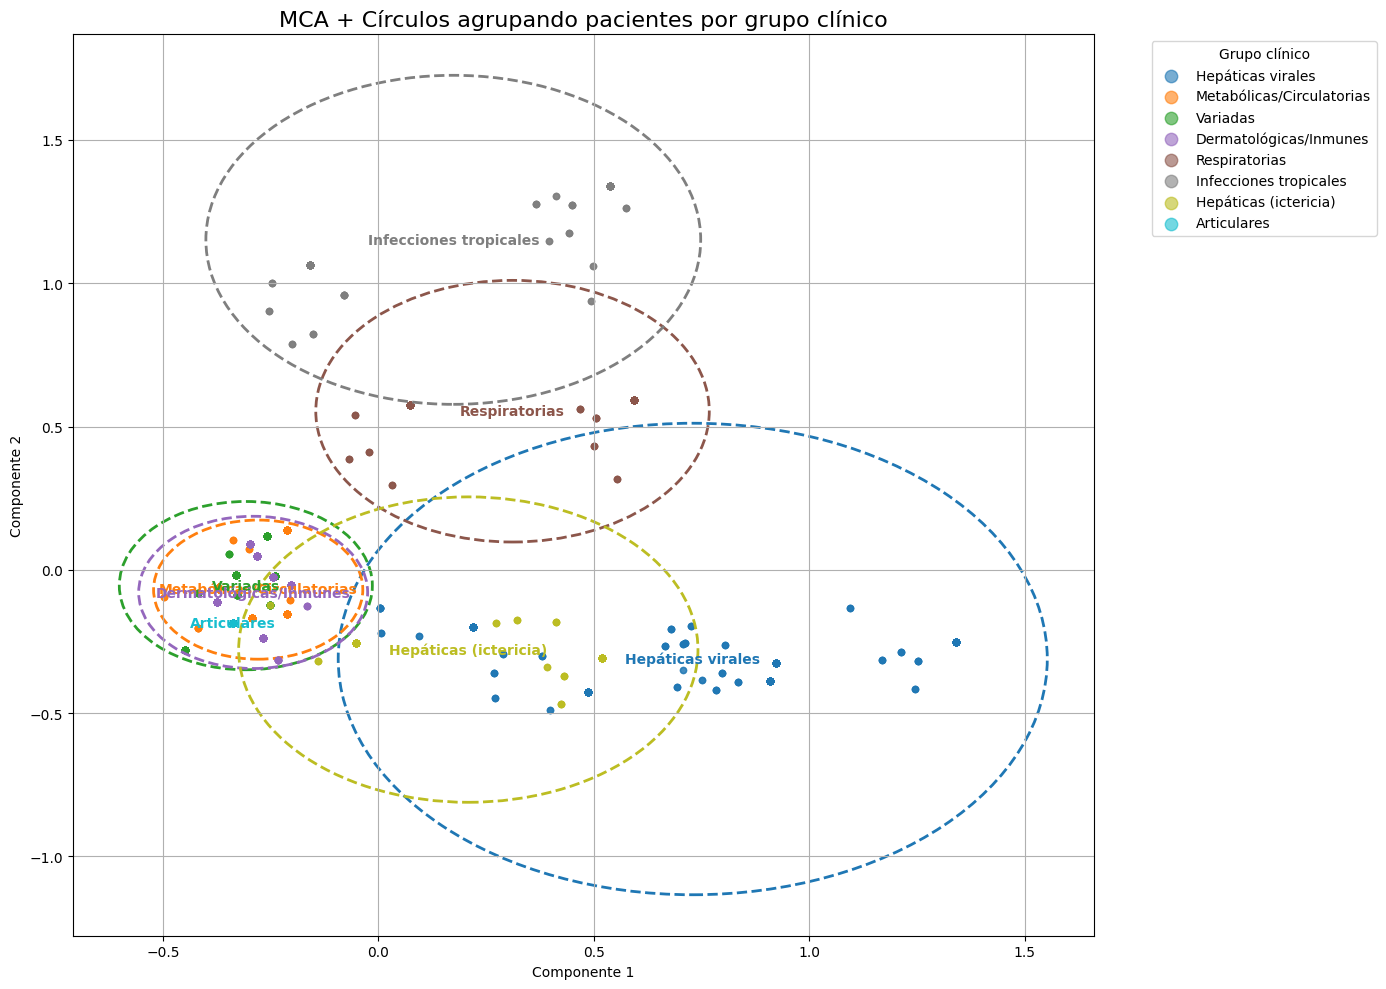

In [33]:
import pandas as pd
import prince
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

# 1. Seleccionamos las 20 variables más relevantes
X_reducido = df[top_20_sintomas]

# 3. Creamos el mapeo de enfermedades a grupos clínicos (igual que tú)
mapa_enfermedades_grupos = {
    'Arthritis': 'Articulares',
    'Osteoarthritis': 'Articulares',
    'AIDS': 'Dermatológicas/Inmunes',
    'Impetigo': 'Dermatológicas/Inmunes',
    'Dimorphic hemorrhoids': 'Dermatológicas/Inmunes',
    'Psoriasis': 'Dermatológicas/Inmunes',
    'Acne': 'Dermatológicas/Inmunes',
    'Drug reaction': 'Dermatológicas/Inmunes',
    'Fungal infection': 'Dermatológicas/Inmunes',
    'Allergy': 'Dermatológicas/Inmunes',
    'Urinary tract infection': 'Dermatológicas/Inmunes',
    'Jaundice': 'Hepáticas (ictericia)',
    'Alcoholic hepatitis': 'Hepáticas (ictericia)',
    'Peptic ulcer disease': 'Hepáticas (ictericia)',
    'GERD': 'Variadas',
    'Heart attack': 'Variadas',
    'Gastroenteritis': 'Variadas',
    'Paralysis (brain hemorrhage)': 'Variadas',
    'Paroxysmal Positional Vertigo': 'Variadas',
    'Cervical spondylosis': 'Variadas',
    'Hyperthension': 'Variadas',
    'Hypothyroidism': 'Metabólicas/Circulatorias',
    'Hyperthyroidism': 'Metabólicas/Circulatorias',
    'Diabetes': 'Metabólicas/Circulatorias',
    'Hypoglycemia': 'Metabólicas/Circulatorias',
    'Varicose veins': 'Metabólicas/Circulatorias',
    'Hepatitis A': 'Hepáticas virales',
    'Hepatitis B': 'Hepáticas virales',
    'Hepatitis C': 'Hepáticas virales',
    'Hepatitis D': 'Hepáticas virales',
    'Hepatitis E': 'Hepáticas virales',
    'Chronic cholestasis': 'Hepáticas virales',
    'Malaria': 'Infecciones tropicales',
    'Dengue': 'Infecciones tropicales',
    'Thyroid': 'Infecciones tropicales',  # Asumiendo que es fiebre tifoidea (typhoid)
    'Common cold': 'Respiratorias',
    'Pneumonia': 'Respiratorias',
    'Tuberculosis': 'Respiratorias'
}

# 4. Asignamos grupos y filtramos
df['grupo_clinico'] = df['prognosis'].map(mapa_enfermedades_grupos)
df_grupos = df.dropna(subset=['grupo_clinico'])
X_reducido = X_reducido.loc[df_grupos.index]

# 5. Ajustamos el MCA
mca = prince.MCA(n_components=2, random_state=42)
mca = mca.fit(X_reducido)

# 6. Proyectamos filas
mca_filas = mca.row_coordinates(X_reducido)
mca_filas['grupo_clinico'] = df_grupos['grupo_clinico'].values

# --- Gráfico con círculos ---

plt.figure(figsize=(14, 10))
ax = plt.gca()

# Colores automáticos por grupo
grupos = mca_filas['grupo_clinico'].unique()
colores = plt.cm.tab10(np.linspace(0, 1, len(grupos)))

for color, grupo in zip(colores, grupos):
    subset = mca_filas[mca_filas['grupo_clinico'] == grupo]
    x = subset[0].values
    y = subset[1].values
    
    # 1) Dibujar puntos
    ax.scatter(x, y, label=grupo, s=20, alpha=0.6, color=color)
    
    # 2) Calcular centroide
    cx, cy = x.mean(), y.mean()
    
    # 3) Calcular radio = distancia máxima + margen
    distancias = np.sqrt((x - cx)**2 + (y - cy)**2)
    radio = distancias.max() * 1.1  # 10% de margen
    
    # 4) Dibujar círculo
    circ = Circle((cx, cy), radius=radio, 
                  edgecolor=color, facecolor='none', 
                  linewidth=2, linestyle='--')
    ax.add_patch(circ)
    
    # 5) Anotar el nombre en el centro
    ax.text(cx, cy, grupo, fontsize=10, fontweight='bold',
            ha='center', va='center', color=color)

plt.title('MCA + Círculos agrupando pacientes por grupo clínico', fontsize=16)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.legend(markerscale=2, bbox_to_anchor=(1.05,1), loc='upper left', 
           title='Grupo clínico')
plt.tight_layout()
plt.show()


Gráfico resultado del MCA donde muestran los grupos de enfermedades

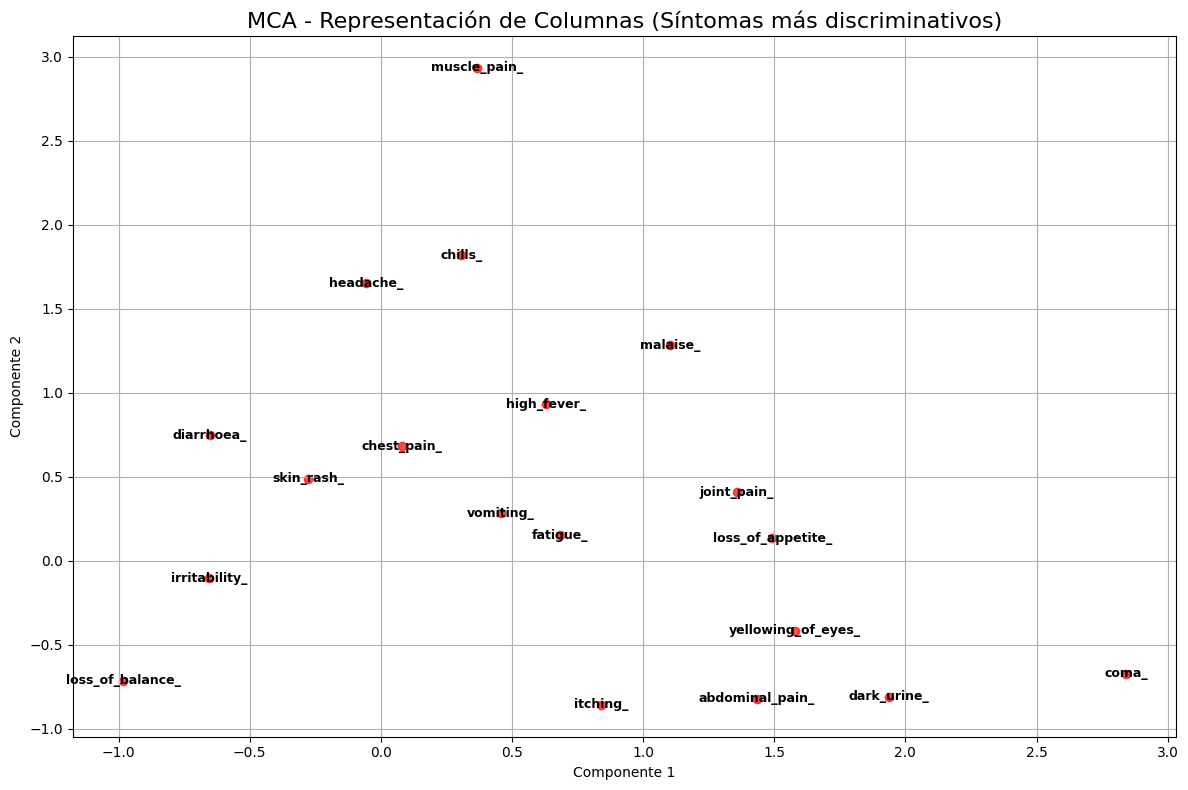

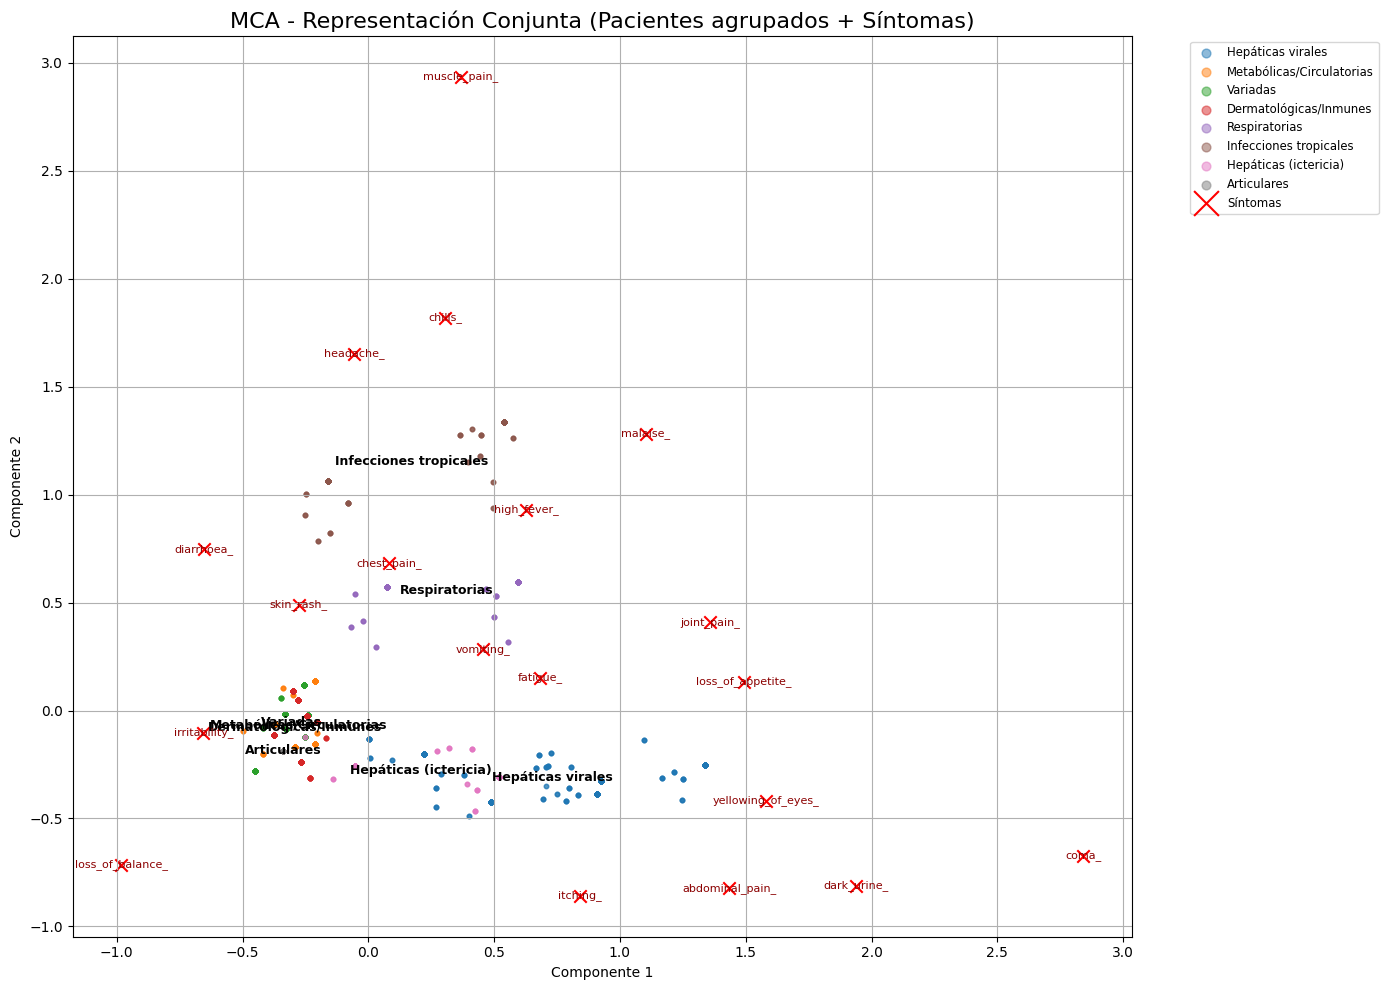

In [34]:
import matplotlib.pyplot as plt

# =========================
# Gráfico de Columnas (Síntomas)
# =========================
plt.figure(figsize=(12, 8))

# Recordamos que los síntomas codificados tienen el sufijo "_1"
columnas_presentes = [col for col in mca_columnas.index if col.endswith('_1')]

# Limpiamos nombres (quitamos "_1")
nombres_columnas = [col.replace('_1', '') for col in columnas_presentes]

# Extraemos coordenadas
coords_columnas = mca_columnas.loc[columnas_presentes]

plt.scatter(coords_columnas[0], coords_columnas[1], color='red', alpha=0.7)

# Etiquetas de síntomas
for i, nombre in enumerate(nombres_columnas):
    plt.text(coords_columnas.iloc[i, 0], coords_columnas.iloc[i, 1], nombre,
             fontsize=9, ha='center', va='center', weight='bold')

plt.title('MCA - Representación de Columnas (Síntomas más discriminativos)', fontsize=16)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================
# Gráfico Conjunto (Pacientes + Síntomas)
# =========================
plt.figure(figsize=(14, 10))

# Pintamos los pacientes
for grupo in mca_filas['grupo_clinico'].unique():
    subset = mca_filas[mca_filas['grupo_clinico'] == grupo]
    plt.scatter(subset[0], subset[1], label=grupo, s=10, alpha=0.5)

# Pintamos los síntomas
plt.scatter(coords_columnas[0], coords_columnas[1], color='red', marker='x', s=80, label='Síntomas')

# Etiquetamos centroides de grupos
for grupo in mca_filas['grupo_clinico'].unique():
    subset = mca_filas[mca_filas['grupo_clinico'] == grupo]
    x_centroide = subset[0].mean()
    y_centroide = subset[1].mean()
    plt.text(x_centroide, y_centroide, grupo, fontsize=9, weight='bold', ha='center', va='center')

# Etiquetamos síntomas
for i, nombre in enumerate(nombres_columnas):
    plt.text(coords_columnas.iloc[i, 0], coords_columnas.iloc[i, 1], nombre,
             fontsize=8, color='darkred', ha='center', va='center')

plt.title('MCA - Representación Conjunta (Pacientes agrupados + Síntomas)', fontsize=16)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()


Biplot resultado del MCA, tanto de los síntomas como el de síntomas y enfermedades (conjuntos)

In [35]:
import numpy as np
import pandas as pd

# =========================
# Contribuciones de las columnas (síntomas)
# =========================

# Recordatorio: síntomas presentes son los que tienen el sufijo "_1"
columnas_presentes = [col for col in mca_columnas.index if col.endswith('_1')]

# Coordenadas de los síntomas
coords_columnas = mca_columnas.loc[columnas_presentes]

# Calcular la contribución de cada síntoma en cada componente:
# Contribución = (coordenada^2) / (suma de coordenadas^2 de todas las variables)
varianza_total_componente_1 = (coords_columnas[0] ** 2).sum()
varianza_total_componente_2 = (coords_columnas[1] ** 2).sum()

contribuciones = pd.DataFrame({
    'Síntoma': [col.replace('_1', '') for col in columnas_presentes],
    'Contribución Comp.1': (coords_columnas[0] ** 2) / varianza_total_componente_1,
    'Contribución Comp.2': (coords_columnas[1] ** 2) / varianza_total_componente_2
})

# Mostrar resultados ordenados
contribuciones = contribuciones.sort_values(by='Contribución Comp.1', ascending=False).reset_index(drop=True)

# Mostrar tabla
print(contribuciones)

# Si quieres puedes visualizar solo las más importantes:
print("\nTop 10 síntomas con mayor contribución al primer componente:")
display(contribuciones[['Síntoma', 'Contribución Comp.1']].head(10))

print("\nTop 10 síntomas con mayor contribución al segundo componente:")
display(contribuciones[['Síntoma', 'Contribución Comp.2']].sort_values(by='Contribución Comp.2', ascending=False).head(10))


               Síntoma  Contribución Comp.1  Contribución Comp.2
0                coma_             0.315649             0.020718
1          dark_urine_             0.146871             0.030007
2   yellowing_of_eyes_             0.097492             0.007922
3    loss_of_appetite_             0.087005             0.000802
4      abdominal_pain_             0.080423             0.030856
5          joint_pain_             0.072071             0.007629
6             malaise_             0.047576             0.074891
7     loss_of_balance_             0.037742             0.023238
8             itching_             0.027609             0.033573
9             fatigue_             0.018251             0.001042
10       irritability_             0.016774             0.000483
11          diarrhoea_             0.016634             0.025447
12         high_fever_             0.015411             0.039446
13           vomiting_             0.008137             0.003679
14        muscle_pain_   

,Síntoma,Contribución Comp.1
0,coma_,0.315649
1,dark_urine_,0.146871
2,yellowing_of_eyes_,0.097492
3,loss_of_appetite_,0.087005
4,abdominal_pain_,0.080423
5,joint_pain_,0.072071
6,malaise_,0.047576
7,loss_of_balance_,0.037742
8,itching_,0.027609
9,fatigue_,0.018251



Top 10 síntomas con mayor contribución al segundo componente:


,Síntoma,Contribución Comp.2
14,muscle_pain_,0.392786
15,chills_,0.150796
18,headache_,0.124575
6,malaise_,0.074891
12,high_fever_,0.039446
8,itching_,0.033573
4,abdominal_pain_,0.030856
1,dark_urine_,0.030007
11,diarrhoea_,0.025447
7,loss_of_balance_,0.023238


Contribuciones de las variables (síntomas) a cada uno de los componentes del biplot

C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


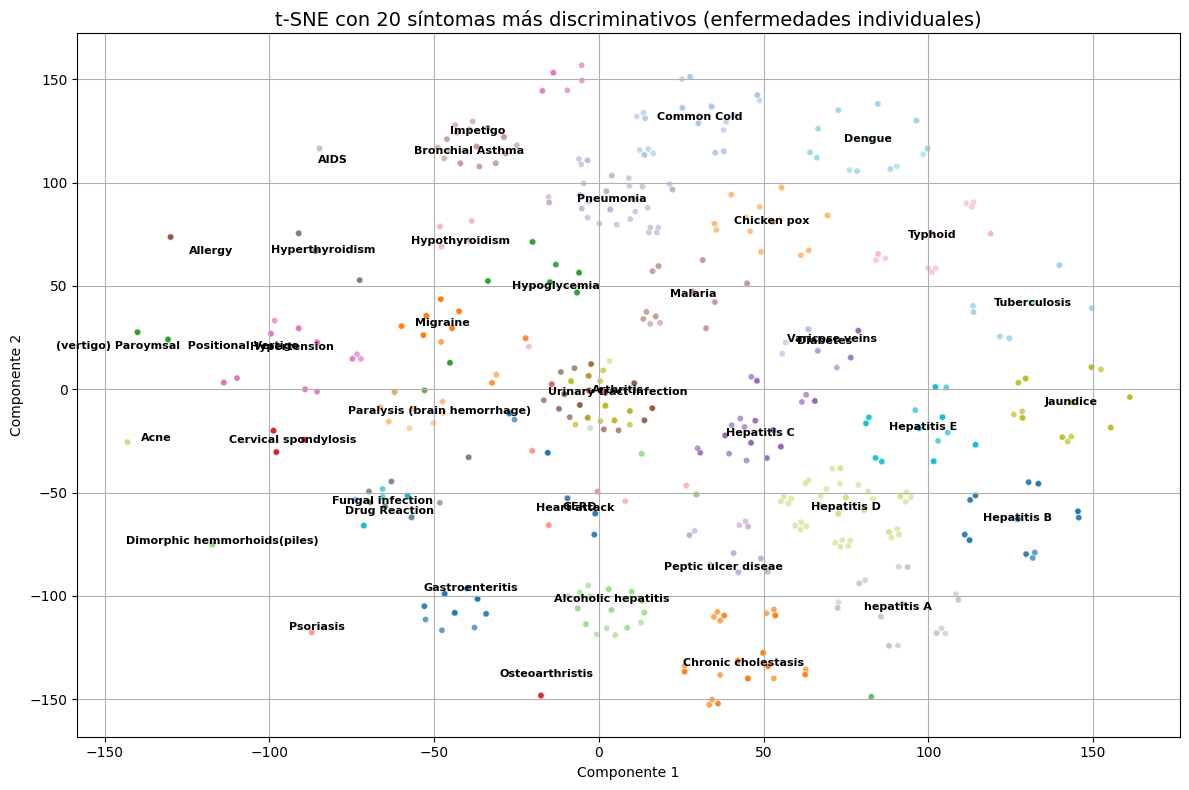

In [36]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Datos: usamos los 20 síntomas más discriminativos
X_tsne = df[top_20_sintomas]
y_tsne = df_train['prognosis']

# 2. Aplicar t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_embedded = tsne.fit_transform(X_tsne)

# 3. Crear DataFrame con resultados
df_tsne = pd.DataFrame(X_embedded, columns=['Dim 1', 'Dim 2'])
df_tsne['Enfermedad'] = y_tsne.values

# 4. Calcular centroides por enfermedad
centroides_enfermedades = df_tsne.groupby('Enfermedad')[['Dim 1', 'Dim 2']].mean()

# 5. Visualización
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_tsne, x='Dim 1', y='Dim 2', hue='Enfermedad', palette='tab20', s=20, alpha=0.7, legend=False)

# 6. Anotar el nombre de cada enfermedad en su centroide
for enfermedad, coords in centroides_enfermedades.iterrows():
    plt.text(coords['Dim 1'], coords['Dim 2'], enfermedad, fontsize=8, weight='bold', ha='center', va='center')

plt.title('t-SNE con 20 síntomas más discriminativos (enfermedades individuales)', fontsize=14)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.tight_layout()
plt.show()


Resultado del t-SNE para 20 síntomas más representativos

C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\umap\umap_.py:1887: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


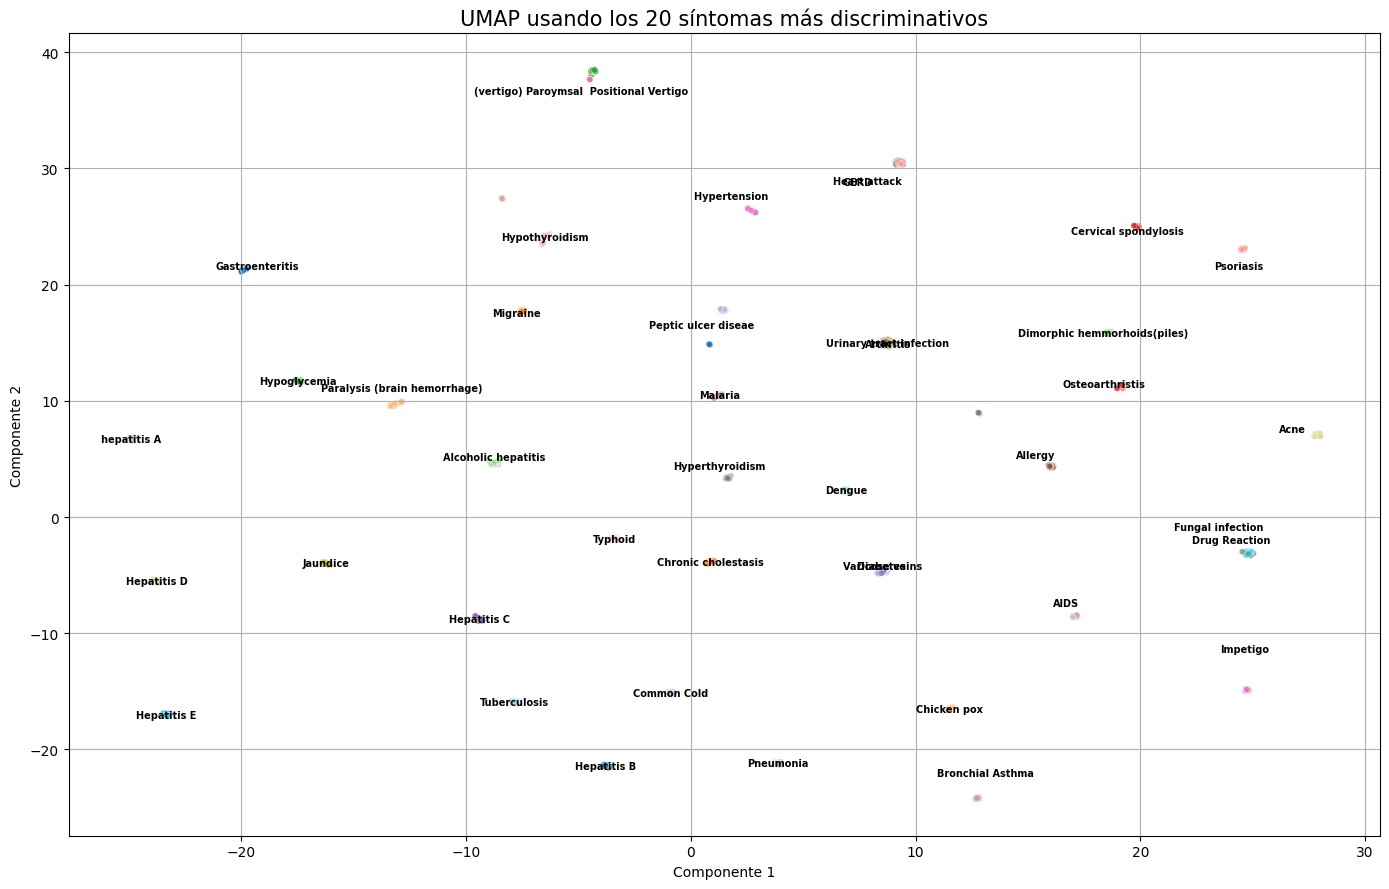

In [37]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# 2. Extraer datos
X_umap = df_train_selected[top_20_sintomas]
y_umap = df_train_selected['prognosis']

# 3. Aplicar UMAP
reductor = umap.UMAP(n_components=2, random_state=42, metric='jaccard')
X_embedded_umap = reductor.fit_transform(X_umap)

# 4. Crear DataFrame de resultados
df_umap = pd.DataFrame(X_embedded_umap, columns=['Dim 1', 'Dim 2'])
df_umap['Enfermedad'] = y_umap.values

# 5. Calcular centroides por enfermedad
centroides_umap = df_umap.groupby('Enfermedad')[['Dim 1', 'Dim 2']].mean()

# 6. Visualización
plt.figure(figsize=(14, 9))
sns.scatterplot(data=df_umap, x='Dim 1', y='Dim 2', hue='Enfermedad', palette='tab20', s=20, alpha=0.7, legend=False)

# Anotar el nombre de cada enfermedad en su centroide
for enfermedad, coords in centroides_umap.iterrows():
    plt.text(coords['Dim 1'], coords['Dim 2'], enfermedad, fontsize=7, weight='bold', ha='center', va='center')

plt.title('UMAP usando los 20 síntomas más discriminativos', fontsize=15)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\umap\umap_.py:1887: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


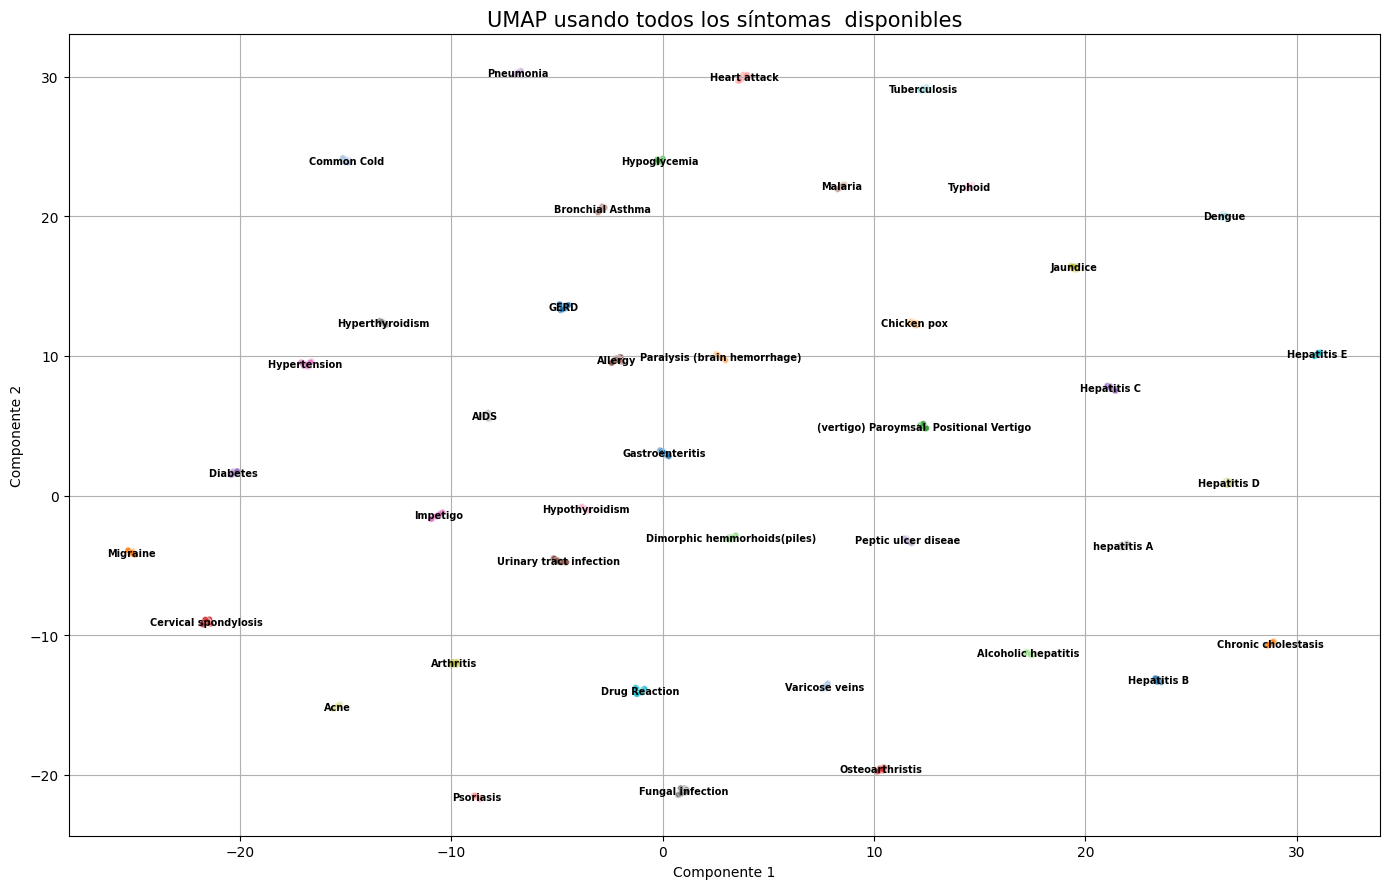

In [38]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Extraer columnas de síntomas verdaderamente numéricas (0/1)
columna_respuesta = 'prognosis' if 'prognosis' in df.columns else df.columns[-1]
columnas_sintomas = df.columns[df.columns != columna_respuesta]

# Filtramos las columnas que solo tienen valores 0 y 1
sintomas_binarios = [col for col in columnas_sintomas if set(df[col].dropna().unique()).issubset({0, 1})]

X_umap_all = df[sintomas_binarios]
y_umap_all = df[columna_respuesta]

# 2. Aplicar UMAP
reductor_all = umap.UMAP(n_components=2, random_state=42, metric='jaccard')
X_embedded_umap_all = reductor_all.fit_transform(X_umap_all)

# 3. Crear DataFrame de resultados
df_umap_all = pd.DataFrame(X_embedded_umap_all, columns=['Dim 1', 'Dim 2'])
df_umap_all['Enfermedad'] = y_umap_all.values

# 4. Calcular centroides por enfermedad
centroides_umap_all = df_umap_all.groupby('Enfermedad')[['Dim 1', 'Dim 2']].mean()

# 5. Visualización
plt.figure(figsize=(14, 9))
sns.scatterplot(data=df_umap_all, x='Dim 1', y='Dim 2', hue='Enfermedad', palette='tab20', s=20, alpha=0.7, legend=False)

# Anotar el nombre de cada enfermedad en su centroide
for enfermedad, coords in centroides_umap_all.iterrows():
    plt.text(coords['Dim 1'], coords['Dim 2'], enfermedad, fontsize=7, weight='bold', ha='center', va='center')

plt.title('UMAP usando todos los síntomas  disponibles', fontsize=15)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 0/500, Loss: 0.6930
Epoch 50/500, Loss: 0.3642
Epoch 100/500, Loss: 0.2882
Epoch 150/500, Loss: 0.2787
Epoch 200/500, Loss: 0.2718
Epoch 250/500, Loss: 0.2661
Epoch 300/500, Loss: 0.2617
Epoch 350/500, Loss: 0.2582
Epoch 400/500, Loss: 0.2554
Epoch 450/500, Loss: 0.2531


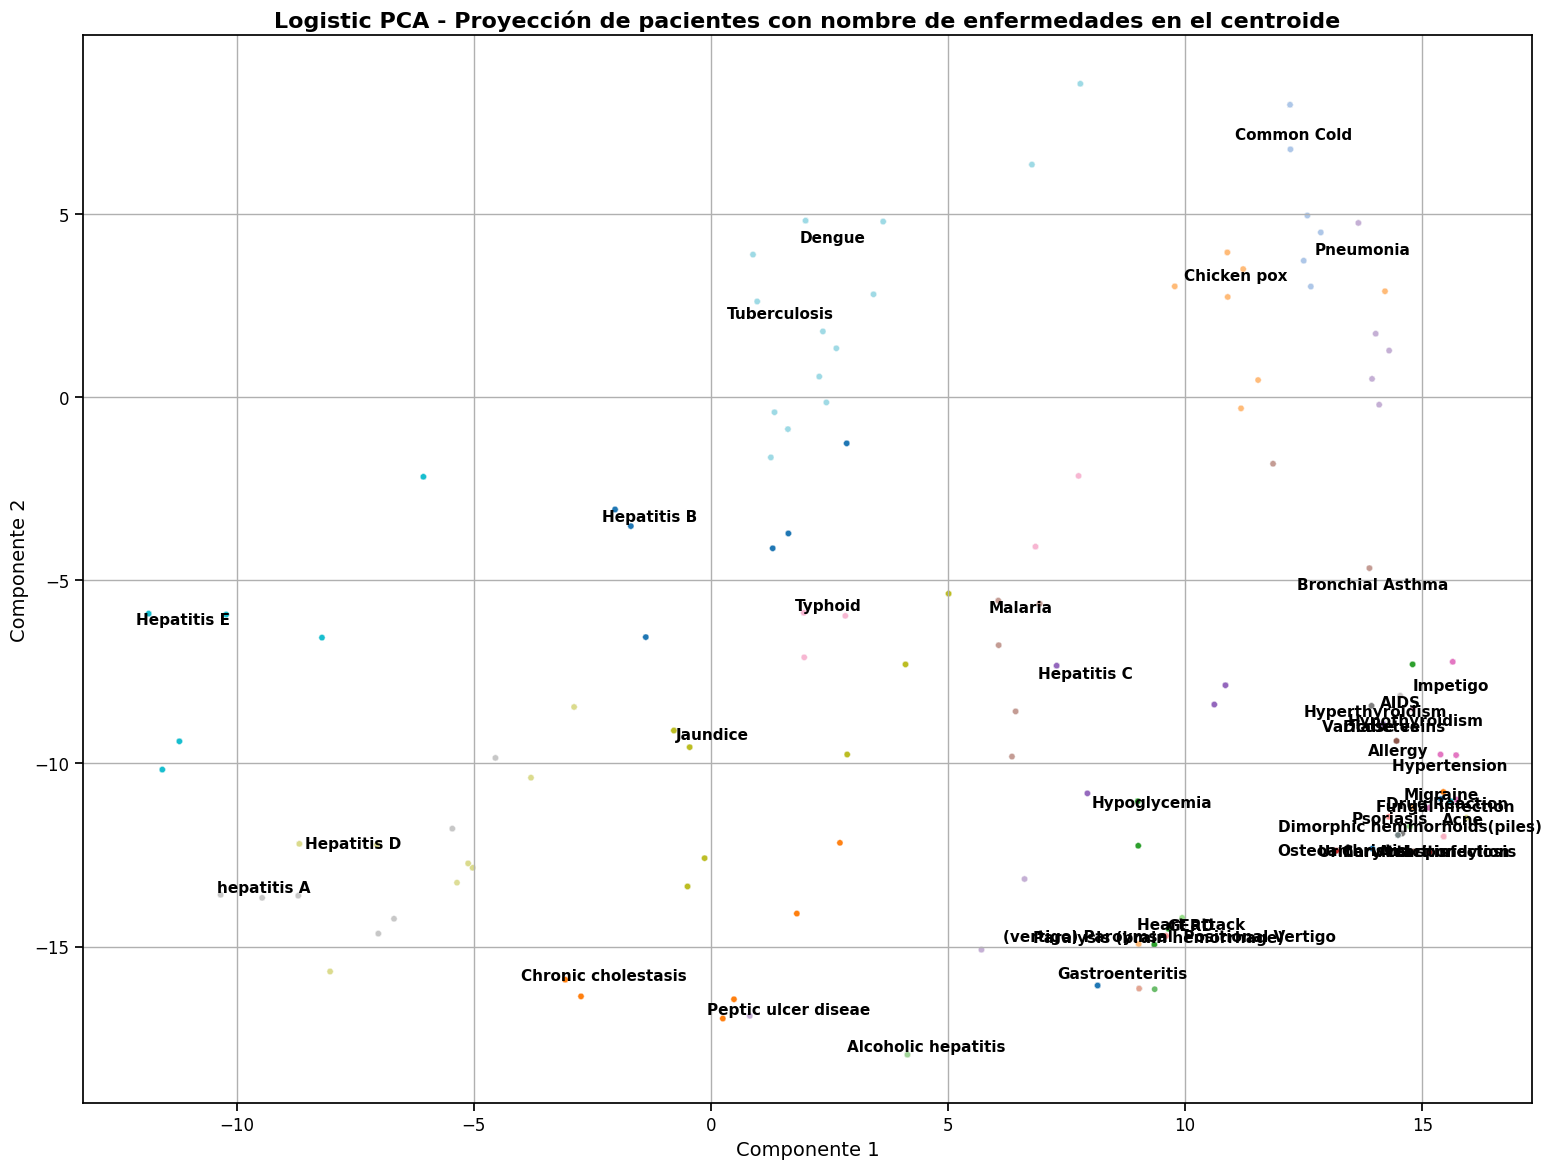

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from logisticpca import LogisticPCA

# 1. Preparar los datos
X = df[top_20_sintomas].astype(float).values
y = df['prognosis'].values
n_features = X.shape[1]

# 2. Convertir a tensor
X_tensor = torch.tensor(X, dtype=torch.float32)

# 3. Aplicar Logistic PCA
model = LogisticPCA(n_components=2, n_features=n_features)
model.fit(X_tensor)

# 4. Transformar y convertir a NumPy
X_reducido = model.transform(X_tensor)
if isinstance(X_reducido, torch.Tensor):
    X_reducido = X_reducido.detach().numpy()

# 5. Crear DataFrame
df_reducido = pd.DataFrame(X_reducido, columns=['Componente 1', 'Componente 2'])
df_reducido['prognosis'] = y

# 6. Graficar con fuente ampliada
plt.figure(figsize=(16, 12))  # Más grande
sns.set_context("notebook", font_scale=1.4)  # Escala general

sns.scatterplot(
    data=df_reducido,
    x='Componente 1',
    y='Componente 2',
    hue='prognosis',
    palette='tab20',
    s=20,  # Aumenta el tamaño de los puntos si lo deseas
    alpha=0.7
)

# 7. Etiquetar centroides con fuente más grande
for enfermedad in df_reducido['prognosis'].unique():
    grupo = df_reducido[df_reducido['prognosis'] == enfermedad]
    x_med = grupo['Componente 1'].mean()
    y_med = grupo['Componente 2'].mean()
    plt.text(x_med, y_med, enfermedad, fontsize=11, ha='center', va='center', weight='bold')

# Estética del gráfico
plt.title('Logistic PCA - Proyección de pacientes con nombre de enfermedades en el centroide', fontsize=16, weight='bold')
plt.xlabel('Componente 1', fontsize=14)
plt.ylabel('Componente 2', fontsize=14)
plt.tick_params(labelsize=12)
plt.legend([],[], frameon=False)  # Oculta leyenda
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 0/500, Loss: 0.6923
Epoch 50/500, Loss: 0.1860
Epoch 100/500, Loss: 0.1650
Epoch 150/500, Loss: 0.1576
Epoch 200/500, Loss: 0.1549
Epoch 250/500, Loss: 0.1540
Epoch 300/500, Loss: 0.1535
Epoch 350/500, Loss: 0.1532
Epoch 400/500, Loss: 0.1530
Epoch 450/500, Loss: 0.1528


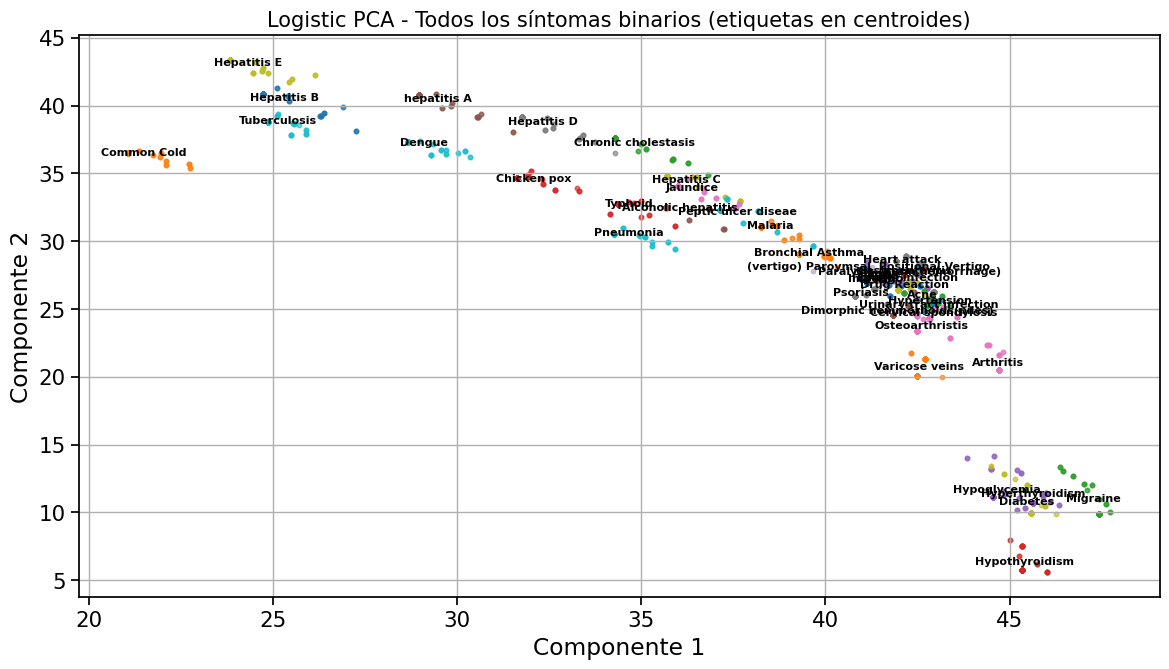

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from logisticpca import LogisticPCA

# Filtrar solo columnas binarias (0/1) y excluir 'prognosis'
columnas_binarias = [
    col for col in df.columns
    if df[col].dropna().isin([0, 1]).all() and col != 'prognosis'
]

# Datos binarios
X = df[columnas_binarias].astype(float).values
y = df['prognosis'].values

# Convertir a tensor
X_tensor = torch.tensor(X, dtype=torch.float32)

# Logistic PCA
model = LogisticPCA(n_components=2, n_features=X.shape[1])
model.fit(X_tensor)

# Proyección
X_reducido = model.transform(X_tensor)

# Crear DataFrame
df_reducido = pd.DataFrame(X_reducido, columns=['Componente 1', 'Componente 2'])
df_reducido['prognosis'] = y

# Plot con nombre de la enfermedad en el centroide
plt.figure(figsize=(12, 7))
for enfermedad in df_reducido['prognosis'].unique():
    puntos = df_reducido[df_reducido['prognosis'] == enfermedad]
    plt.scatter(puntos['Componente 1'], puntos['Componente 2'], s=10, alpha=0.4)
    
    # Centroide
    cx = puntos['Componente 1'].mean()
    cy = puntos['Componente 2'].mean()
    plt.text(cx, cy, enfermedad, fontsize=8, ha='center', weight='bold')

plt.title('Logistic PCA - Todos los síntomas binarios (etiquetas en centroides)', fontsize=15)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [107]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder

feature_names = top_20_sintomas
df_sin_enfermedades = df.drop(columns=['prognosis'])
todos_sintomas = df_sin_enfermedades.columns.tolist()

df.columns.tolist
le = LabelEncoder()
le.fit(df['prognosis'])
class_name= le.classes_

x_train = df_train[todos_sintomas].astype(int).values
y_train = df_train['prognosis'].values
x_test = df_test[todos_sintomas].astype(int).values
y_test = df_test['prognosis'].values

x_train_reducido = df_train[top_20_sintomas].astype(int).values
y_train_reducido = df_train['prognosis'].values
x_test_reducido = df_test[top_20_sintomas].astype(int).values
y_test_reducido = df_test['prognosis'].values



# Confirmar tamaños
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]} pacientes')
print(f'Tamaño del conjunto de test: {x_test.shape[0]} pacientes')


Tamaño del conjunto de entrenamiento: 3473 pacientes
Tamaño del conjunto de test: 1489 pacientes


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Entrenar el árbol con profundidad limitada para interpretabilidad
clf_tree = DecisionTreeClassifier(
    criterion='entropy',     # o 'gini'
    random_state=42
)
clf_tree.fit(x_train, y_train)

# Evaluación rápida
y_pred = clf_tree.predict(x_test)
print("Accuracy del árbol inicial:", accuracy_score(y_test, y_pred))
# Métricas detalladas por clase
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Profundidad del árbol:", clf_tree.get_depth())

Accuracy del árbol inicial: 1.0
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        36
                                   AIDS       1.00      1.00      1.00        36
                                   Acne       1.00      1.00      1.00        36
                    Alcoholic hepatitis       1.00      1.00      1.00        37
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       1.00      1.00      1.00        36
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        36
                    Chronic cholestasis       1.00      1.00      1.00        36
                            Common Cold       1.00      1.00      1.00      

Árbol con todos los síntomas sin límite de profundidad

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Entrenar el árbol con profundidad limitada para interpretabilidad
clf_tree = DecisionTreeClassifier(
    criterion='entropy',     # o 'gini'
    max_depth=10,
    random_state=42
)
clf_tree.fit(x_train_reducido, y_train_reducido)

# Evaluación rápida
y_pred = clf_tree.predict(x_test_reducido)
print("Accuracy del árbol inicial:", accuracy_score(y_test_reducido, y_pred))
# Métricas detalladas por clase
print(classification_report(y_test_reducido, y_pred, target_names=le.classes_))

print("Profundidad del árbol:", clf_tree.get_depth())

Accuracy del árbol inicial: 0.842175957018133
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.94      0.97        36
                                   AIDS       0.92      0.94      0.93        36
                                   Acne       0.66      0.97      0.79        36
                    Alcoholic hepatitis       0.89      0.84      0.86        37
                                Allergy       1.00      0.89      0.94        36
                              Arthritis       0.30      1.00      0.46        36
                       Bronchial Asthma       1.00      0.81      0.89        36
                   Cervical spondylosis       1.00      0.92      0.96        37
                            Chicken pox       1.00      1.00      1.00        36
                    Chronic cholestasis       1.00      0.92      0.96        36
                            Common Cold       1.00      1.00  

C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Árbol con todos los 20 síntomas más representativos sin límite de profundidad

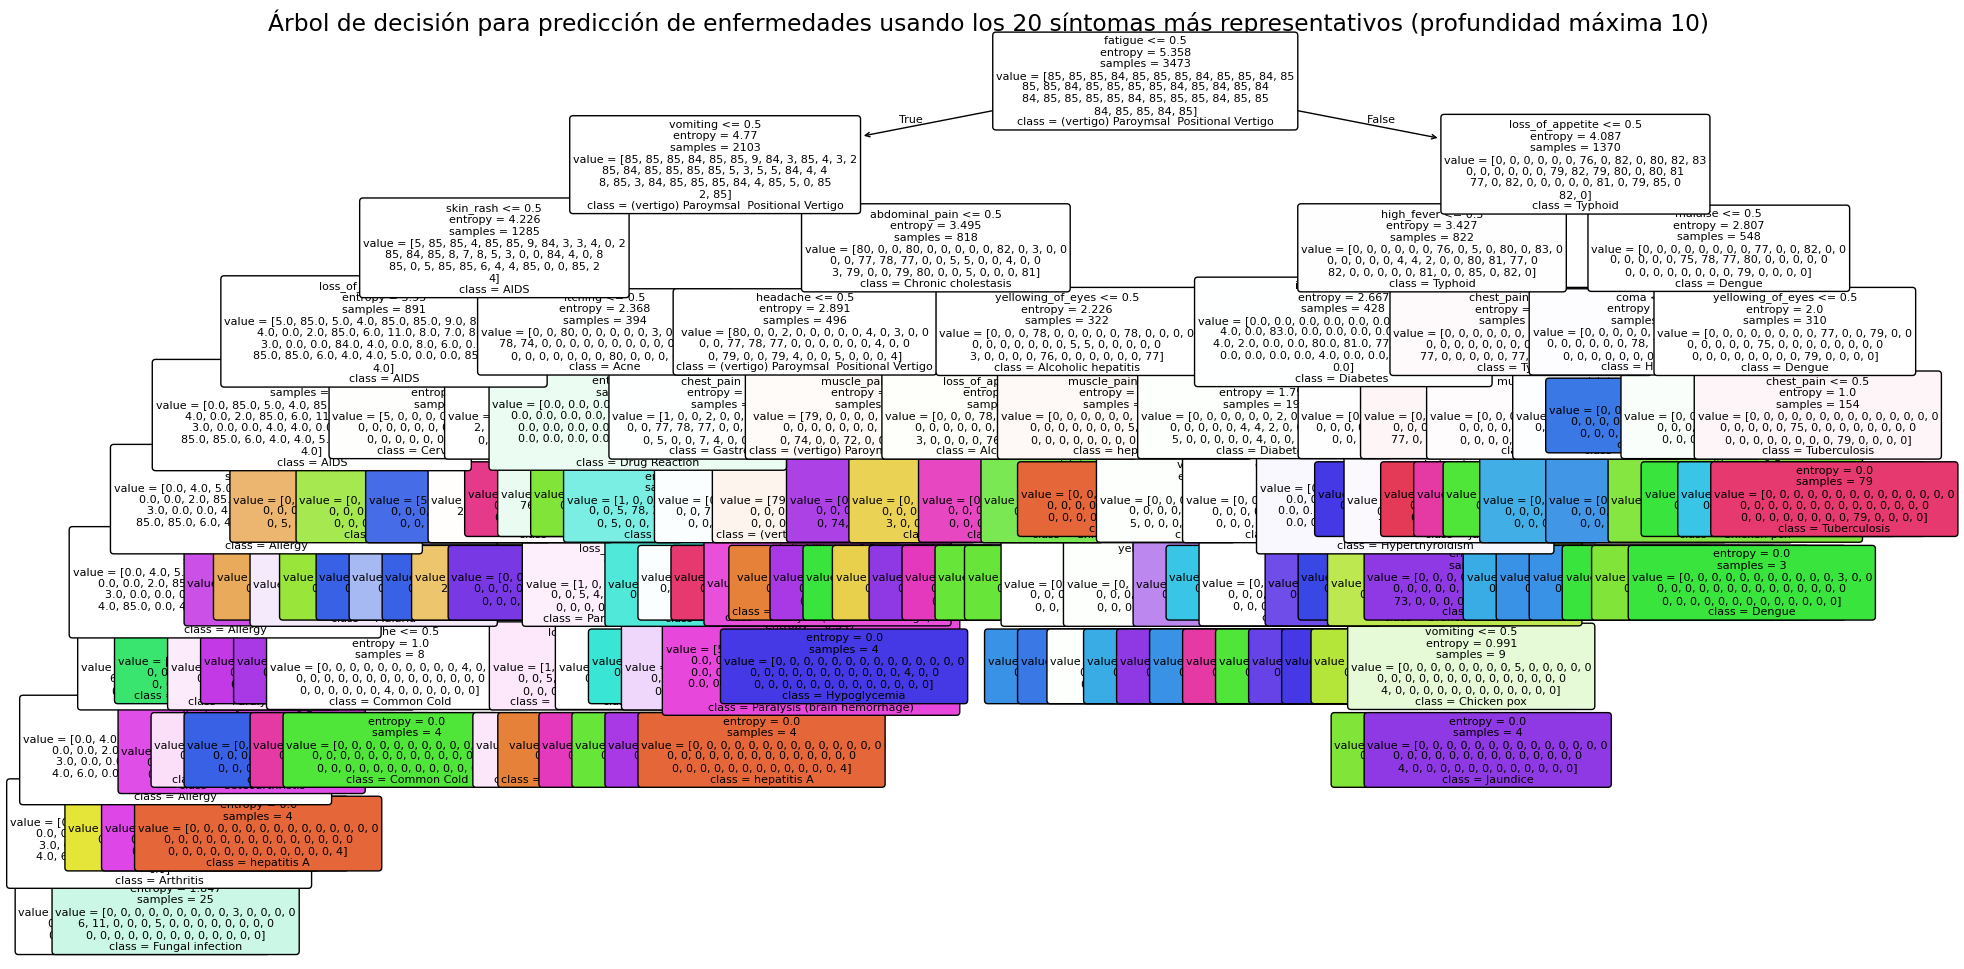

In [44]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Aumenta el tamaño para que se vea completo
tree.plot_tree(
    clf_tree,
    feature_names=top_20_sintomas,           # Lista de nombres de síntomas usados
    class_names=le.classes_,             # Lista de nombres de enfermedades
    filled=True,                         # Colores según clase
    rounded=True,                        # Bordes redondeados
    fontsize=8                           # Ajusta para que quepa todo
)
plt.title("Árbol de decisión para predicción de enfermedades usando los 20 síntomas más representativos (profundidad máxima 10)")
plt.tight_layout()
plt.savefig("arbol_decision_tfg.png", dpi=300)  # 🔥 Guarda como imagen de alta calidad
plt.show()


    num_sintomas  accuracy  depth
0             10  0.325722      7
1             20  0.668234     12
2             30  0.809268     14
3             40  0.976494     19
4             50  0.978509     19
5             60  0.983882     21
6             70  0.989255     22
7             80  0.991269     21
8             90  0.994627     24
9            100  0.994627     24
10           110  0.994627     24
11           120  0.994627     24


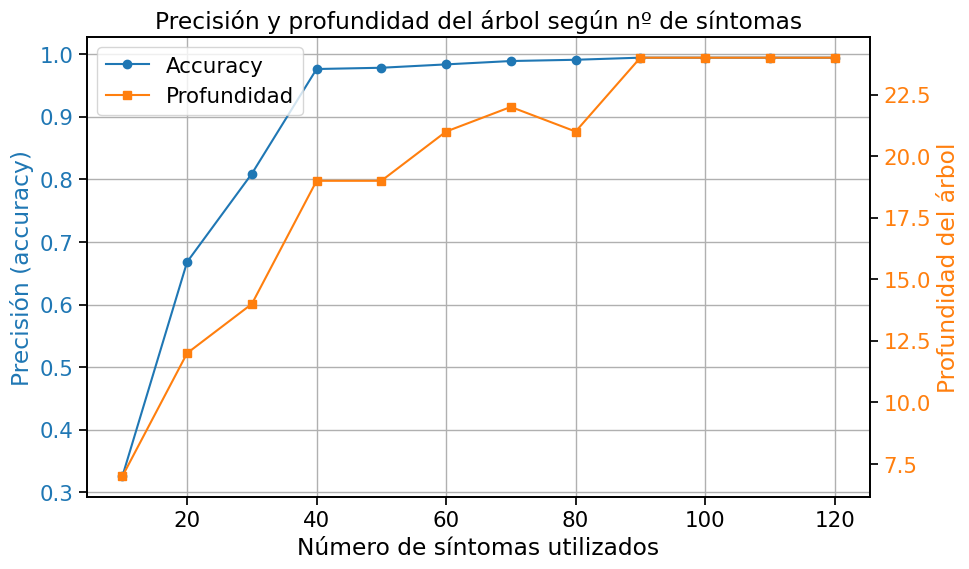

In [45]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Codificar la variable objetivo
le = LabelEncoder()
y = le.fit_transform(df['prognosis'])  # df debe contener síntomas y 'prognosis'

# 2. Ordenar los síntomas por importancia
sintomas_ordenados = tabla_norm.sort_values(
    by='criterio_combinado', ascending=False
)['Síntoma'].tolist()


# 5. Evaluar modelos y recopilar accuracy + profundidad
resultados = []
for n in range(10, 121, 10):
    X_train = x_train[:, :n]
    X_test  = x_test[:, :n]

    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc    = accuracy_score(y_test, y_pred)
    depth  = clf.get_depth()

    resultados.append({
        'num_sintomas': n,
        'accuracy': acc,
        'depth': depth
    })

# 6. DataFrame de resultados
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

# 7. Gráfico con doble eje (accuracy a la izquierda, profundidad a la derecha)
fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = 'tab:blue'
ax1.plot(df_resultados['num_sintomas'],
         df_resultados['accuracy'],
         marker='o', color=color1, label='Accuracy')
ax1.set_xlabel('Número de síntomas utilizados')
ax1.set_ylabel('Precisión (accuracy)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True)

ax2 = ax1.twinx()  # segundo eje y
color2 = 'tab:orange'
ax2.plot(df_resultados['num_sintomas'],
         df_resultados['depth'],
         marker='s', color=color2, label='Profundidad')
ax2.set_ylabel('Profundidad del árbol', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Leyenda combinada
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2,
           labels_1 + labels_2,
           loc='upper left')

plt.title('Precisión y profundidad del árbol según nº de síntomas')
plt.tight_layout()
plt.show()


    max_depth  accuracy
0           1  0.048355
1           2  0.092680
2           3  0.181330
3           4  0.349899
4           5  0.669577
5           6  0.822028
6           7  0.858966
7           8  0.899933
8           9  0.940228
9          10  0.943586
10         11  0.951645
11         12  0.961719
12         13  0.968435
13         14  0.972465
14         15  0.976494
15         16  0.983210
16         17  0.983882
17         18  0.984553
18         19  0.985897
19         20  0.987911


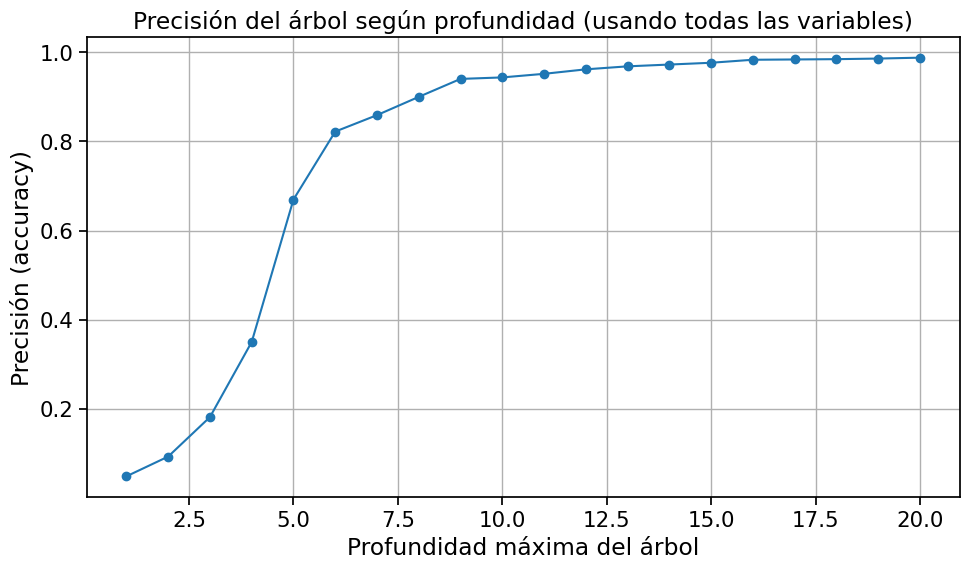

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Suponemos que x_train, x_test, y_train y y_test ya existen y usan todos los síntomas

# 2. Evaluar precisión variando la profundidad del árbol de 1 a 20
resultados = []
max_depth_max = 20

for depth in range(1, max_depth_max + 1):
    clf = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=depth,
        random_state=42
    )
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    resultados.append({
        'max_depth': depth,
        'accuracy': acc
    })

# 3. DataFrame de resultados
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

# 4. Gráfico: precisión vs. profundidad
plt.figure(figsize=(10, 6))
plt.plot(df_resultados['max_depth'],
         df_resultados['accuracy'],
         marker='o', linestyle='-')
plt.title('Precisión del árbol según profundidad (usando todas las variables)')
plt.xlabel('Profundidad máxima del árbol')
plt.ylabel('Precisión (accuracy)')
plt.grid(True)
plt.tight_layout()
plt.show()


    max_depth  accuracy
0           1  0.048355
1           2  0.092680
2           3  0.181330
3           4  0.350571
4           5  0.630625
5           6  0.746810
6           7  0.784419
7           8  0.818670
8           9  0.841504
9          10  0.842176
10         11  0.845534
11         12  0.850235
12         13  0.852921
13         14  0.857623
14         15  0.859637
15         16  0.859637
16         17  0.859637
17         18  0.859637
18         19  0.859637
19         20  0.859637


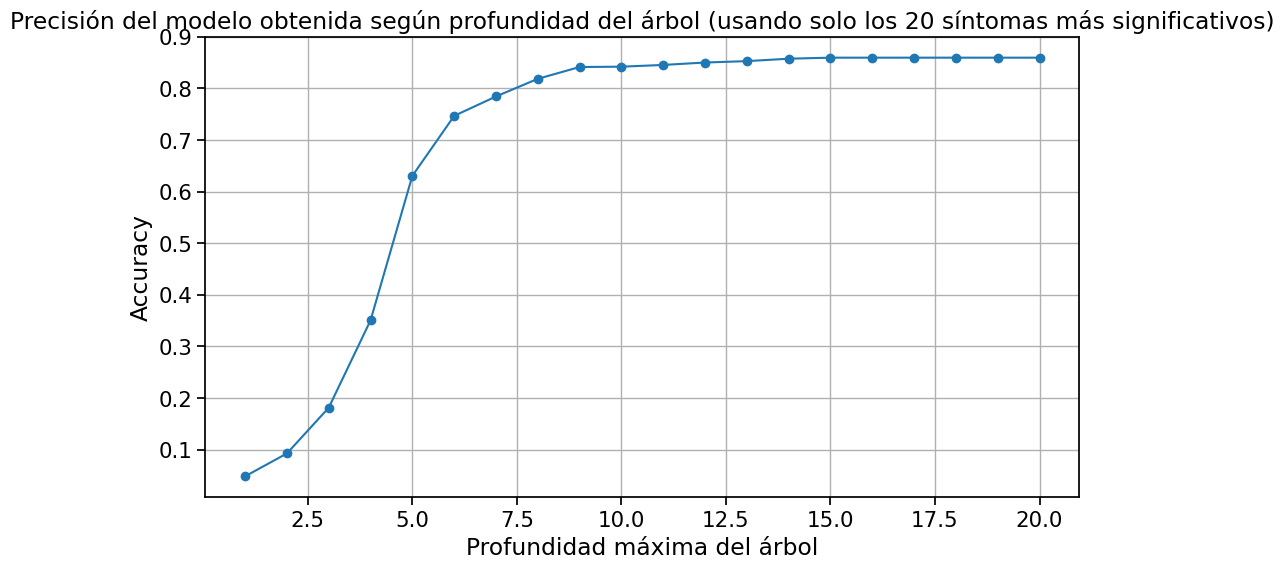

In [47]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Rango de profundidades a probar
max_depth_max = 20

# Recogemos resultados
resultados = []
for depth in range(1, max_depth_max + 1):
    clf = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=depth,
        random_state=42
    )
    clf.fit(x_train_reducido, y_train_reducido)
    y_pred = clf.predict(x_test_reducido)
    acc = accuracy_score(y_test_reducido, y_pred)
    resultados.append({
        'max_depth': depth,
        'accuracy': acc
    })

# Pasamos a DataFrame
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

# Graficamos
plt.figure(figsize=(10, 6))
plt.plot(df_resultados['max_depth'],
         df_resultados['accuracy'],
         marker='o', linestyle='-')
plt.title('Precisión del modelo obtenida según profundidad del árbol (usando solo los 20 síntomas más significativos)')
plt.xlabel('Profundidad máxima del árbol')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()


Accuracy del Random Forest con 20 síntomas: 0.8596

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.94      0.97        36
                                   AIDS       0.92      0.94      0.93        36
                                   Acne       0.66      0.97      0.79        36
                    Alcoholic hepatitis       0.89      0.89      0.89        37
                                Allergy       1.00      0.89      0.94        36
                              Arthritis       0.38      1.00      0.55        36
                       Bronchial Asthma       1.00      0.81      0.89        36
                   Cervical spondylosis       1.00      0.92      0.96        37
                            Chicken pox       1.00      1.00      1.00        36
                    Chronic cholestasis       1.00      1.00      1.00        36
                            Commo

C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


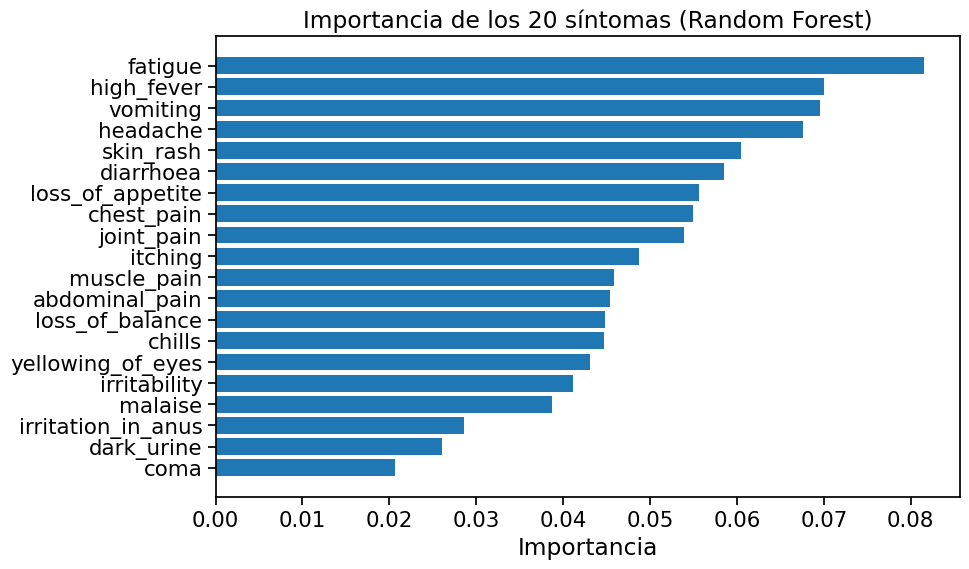

In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# --- 1. Codificar variable objetivo ---
le = LabelEncoder()
y = le.fit_transform(df['prognosis'])  # df contiene los datos con 'prognosis' y los síntomas

# --- 2. Seleccionar las variables del modelo ---
X = df[top_20_sintomas].astype(int).values  # top_20_sintomas debe ser una lista de strings
sintomas = top_20_sintomas  # Para que coincidan en la visualización



# --- 4. Entrenar el modelo Random Forest ---
clf_rf = RandomForestClassifier(n_estimators=200, random_state=42)
clf_rf.fit(x_train_reducido, y_train_reducido)

# --- 5. Evaluar rendimiento ---
y_pred = clf_rf.predict(x_test_reducido)
accuracy = accuracy_score(y_test_reducido, y_pred)
print(f"Accuracy del Random Forest con 20 síntomas: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_reducido, y_pred, target_names=le.classes_))

# --- 6. Importancia de variables ---
importancias = clf_rf.feature_importances_
importancia_df = pd.DataFrame({
    'sintoma': sintomas,
    'importancia': importancias
}).sort_values(by='importancia', ascending=False)

# --- 7. Visualización ---
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['sintoma'][::-1], importancia_df['importancia'][::-1])
plt.title('Importancia de los 20 síntomas (Random Forest)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()


In [67]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector

# --- 1. Codificar variable objetivo ---
le = LabelEncoder()
y = le.fit_transform(df['prognosis'])  # df contiene los datos con 'prognosis' y los síntomas

# --- 2. Seleccionar las variables del modelo ---
X = df[todos_sintomas].astype(int).values  # top_20_sintomas debe ser una lista de strings
sintomas = todos_sintomas # Para que coincidan en la visualización



# --- 4. Entrenar el modelo Random Forest ---
clf_rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth)
clf_rf.fit(x_train, y_train)


# --- 5. Evaluar rendimiento ---
y_pred = clf_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del Random Forest con 131 síntomas: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# --- 6. Importancia de variables ---
importancias = clf_rf.feature_importances_
importancia_df = pd.DataFrame({
    'sintoma': sintomas,
    'importancia': importancias
}).sort_values(by='importancia', ascending=False)



Accuracy del Random Forest con 131 síntomas: 1.0000

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        36
                                   AIDS       1.00      1.00      1.00        36
                                   Acne       1.00      1.00      1.00        36
                    Alcoholic hepatitis       1.00      1.00      1.00        37
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       1.00      1.00      1.00        36
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        36
                    Chronic cholestasis       1.00      1.00      1.00        36
                            Comm

In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.preprocessing import LabelEncoder

# --- Datos ya existentes ---
# df, todos_sintomas, x_train, x_test, y_train, y_test

# Codificamos la variable objetivo
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

# Hiperparámetros del modelo base (ya ajustado)
base_rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    random_state=123
)

#############################################################################
# Opción 1: Selección rápida con RFE (Recursive Feature Elimination)
# ----------------------------------------------------------------------------
modelo_rfe_rf = Pipeline([
    # Si tuvieras preprocesamiento, sustitúyelo aquí; sino, bórralo o usa ('passthrough')
    # ('preprocessing', preprocessor),

    ('select', RFE(
        estimator=base_rf,
        n_features_to_select=15,   # número de preguntas
        step=1
    )),
    ('model', base_rf)
])

# Entrenamos y evaluamos
modelo_rfe_rf.fit(x_train, y_train_enc)
y_pred_rfe = modelo_rfe_rf.predict(x_test)
print("=== Random Forest + RFE (15 preguntas) ===")
print("Accuracy:", accuracy_score(y_test_enc, y_pred_rfe))
print(classification_report(y_test_enc, y_pred_rfe, target_names=le.classes_))


#############################################################################
# Opción 2: Selección más precisa con SFS (Sequential Feature Selector)
# ----------------------------------------------------------------------------
modelo_sfs_rf = Pipeline([
    # ('preprocessing', preprocessor),

    ('select', SequentialFeatureSelector(
        estimator=base_rf,
        n_features_to_select=15,
        direction='forward',   # o 'backward'
        cv=3,                  # pruebas internas; sube a 5 si el tiempo lo permite
        n_jobs=-1
    )),
    ('model', base_rf)
])

# Entrenamos y evaluamos
modelo_sfs_rf.fit(x_train, y_train_enc)
y_pred_sfs = modelo_sfs_rf.predict(x_test)
print("=== Random Forest + SFS (15 preguntas) ===")
print("Accuracy:", accuracy_score(y_test_enc, y_pred_sfs))
print(classification_report(y_test_enc, y_pred_sfs, target_names=le.classes_))


=== Random Forest + RFE (15 preguntas) ===
Accuracy: 0.4539959704499664
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.00      0.00      0.00        36
                                   AIDS       0.00      0.00      0.00        36
                                   Acne       0.00      0.00      0.00        36
                    Alcoholic hepatitis       0.00      0.00      0.00        37
                                Allergy       0.00      0.00      0.00        36
                              Arthritis       0.00      0.00      0.00        36
                       Bronchial Asthma       0.00      0.00      0.00        36
                   Cervical spondylosis       1.00      0.86      0.93        37
                            Chicken pox       1.00      1.00      1.00        36
                    Chronic cholestasis       0.50      0.97      0.66        36
                            Common C

C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


=== Random Forest + SFS (15 preguntas) ===
Accuracy: 0.8582941571524513
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.97      0.99        36
                                   AIDS       0.92      0.94      0.93        36
                                   Acne       0.71      0.97      0.82        36
                    Alcoholic hepatitis       0.49      0.89      0.63        37
                                Allergy       0.00      0.00      0.00        36
                              Arthritis       0.00      0.00      0.00        36
                       Bronchial Asthma       1.00      0.81      0.89        36
                   Cervical spondylosis       1.00      0.92      0.96        37
                            Chicken pox       1.00      1.00      1.00        36
                    Chronic cholestasis       0.97      1.00      0.99        36
                            Common C

C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\xgboost\training.py:183: UserWarning: [10:04:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Precisión del modelo XGBoost con 20 síntomas: 0.8603

Informe de clasificación:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.94      0.97        36
                                   AIDS       0.92      0.94      0.93        36
                                   Acne       0.66      0.97      0.79        36
                    Alcoholic hepatitis       0.89      0.89      0.89        37
                                Allergy       1.00      0.89      0.94        36
                              Arthritis       0.00      0.00      0.00        36
                       Bronchial Asthma       1.00      0.81      0.89        36
                   Cervical spondylosis       1.00      0.92      0.96        37
                            Chicken pox       1.00      1.00      1.00        36
                    Chronic cholestasis       1.00      1.00      1.00        36
                           

C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


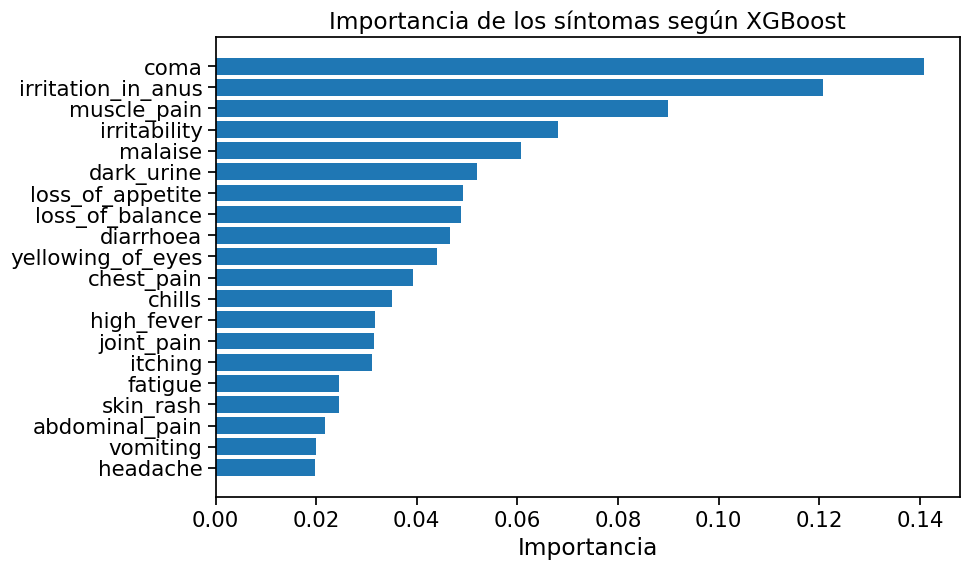

In [66]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# --- 0. Creamos y ajustamos el encoder sobre todas las clases ---
le = LabelEncoder()
le.fit(df['prognosis'])  # tus 41 clases de enfermedad

# --- 1. Codificamos los y_train_reducido / y_test_reducido ---
y_train_reducido_enc = le.transform(y_train_reducido)
y_test_reducido_enc  = le.transform(y_test_reducido)

# --- 2. Definimos y entrenamos el modelo XGBoost ---
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_model.fit(x_train_reducido, y_train_reducido_enc)

# --- 3. Predicción y evaluación ---
y_pred_reducido_enc = xgb_model.predict(x_test_reducido)
accuracy   = accuracy_score(y_test_reducido_enc, y_pred_reducido_enc)
print(f"\nPrecisión del modelo XGBoost con 20 síntomas: {accuracy:.4f}\n")
print("Informe de clasificación:")
print(classification_report(
    y_test_reducido_enc, 
    y_pred_reducido_enc, 
    target_names=le.classes_
))

# --- 4. Importancia de los síntomas ---
importancias = xgb_model.feature_importances_
importancia_df = pd.DataFrame({
    'sintoma': top_20_sintomas,
    'importancia': importancias
}).sort_values(by='importancia', ascending=False)

print("\nSíntomas más importantes según XGBoost:")
print(importancia_df)

# --- 5. Visualizar importancias ---
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['sintoma'][::-1], importancia_df['importancia'][::-1])
plt.xlabel("Importancia")
plt.title("Importancia de los síntomas según XGBoost")
plt.tight_layout()
plt.show()


In [65]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

y = df['prognosis']

# --- 2. Codificar la variable respuesta ---
le = LabelEncoder()
y_enc = le.fit_transform(y)

y_train_enc = le.transform(y_train)
y_test_enc  = le.transform(y_test)


# --- 4. Entrenar modelo XGBoost ---
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_model.fit(x_train, y_train_enc)

# --- 5. Evaluación ---
y_pred_enc = xgb_model.predict(x_test)
accuracy = accuracy_score(y_test_enc, y_pred_enc)
print(f"\nPrecisión del modelo XGBoost usando todos los síntomas: {accuracy:.4f}\n")
print("Informe de clasificación:")
print(classification_report(
    y_test_enc,
    y_pred_enc,
    target_names=le.classes_
))

# --- 6. Importancia de los síntomas ---
importancias = xgb_model.feature_importances_
importancia_df = pd.DataFrame({
    'sintoma': feature_cols,
    'importancia': importancias
}).sort_values(by='importancia', ascending=False)

print("\nSíntomas más importantes según XGBoost:")
print(importancia_df)


C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\xgboost\training.py:183: UserWarning: [10:02:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Precisión del modelo XGBoost usando todos los síntomas: 1.0000

Informe de clasificación:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        36
                                   AIDS       1.00      1.00      1.00        36
                                   Acne       1.00      1.00      1.00        36
                    Alcoholic hepatitis       1.00      1.00      1.00        37
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       1.00      1.00      1.00        36
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        36
                    Chronic cholestasis       1.00      1.00      1.00        36
                 

ValueError: All arrays must be of the same length

C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy de la red neuronal con 20 síntomas: 0.8408

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.97      0.99        36
                                   AIDS       1.00      0.94      0.97        36
                                   Acne       0.66      0.97      0.79        36
                    Alcoholic hepatitis       0.90      1.00      0.95        37
                                Allergy       1.00      0.89      0.94        36
                              Arthritis       0.00      0.00      0.00        36
                       Bronchial Asthma       1.00      1.00      1.00        36
                   Cervical spondylosis       0.00      0.00      0.00        37
                            Chicken pox       1.00      1.00      1.00        36
                    Chronic cholestasis       1.00      1.00      1.00   

C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


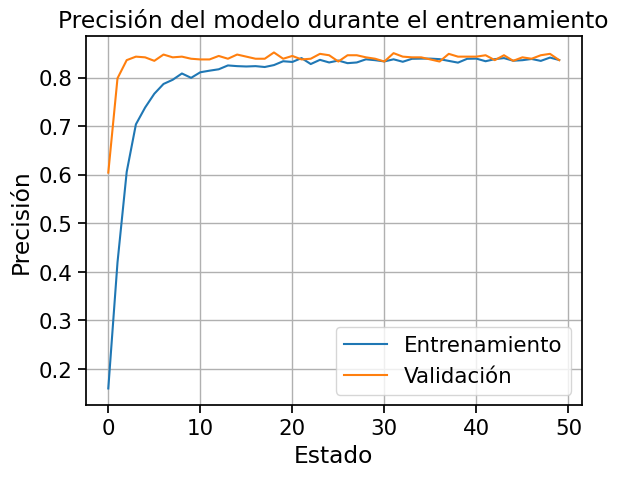

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# --- 1. Codificar variable objetivo ---
le = LabelEncoder()
y_encoded = le.fit_transform(df['prognosis'])
y_categorical = to_categorical(y_encoded)  # Necesario para softmax

# --- 2. Variables predictoras (pueden ser todos los síntomas o los top 20) ---
X = df[top_20_sintomas].astype(int).values
sintomas = top_20_sintomas

# --- 3. División en train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.3, stratify=y_encoded, random_state=42
)

# --- 4. Definir la arquitectura de la red ---
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# --- 5. Compilar y entrenar ---
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                    validation_split=0.2, verbose=0)

# --- 6. Evaluar rendimiento ---
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy de la red neuronal con 20 síntomas: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# --- 7. Curva de aprendizaje ---
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo durante el entrenamiento')
plt.xlabel('Estado')
plt.ylabel('Precisión')
plt.legend()
plt.grid()
plt.show()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


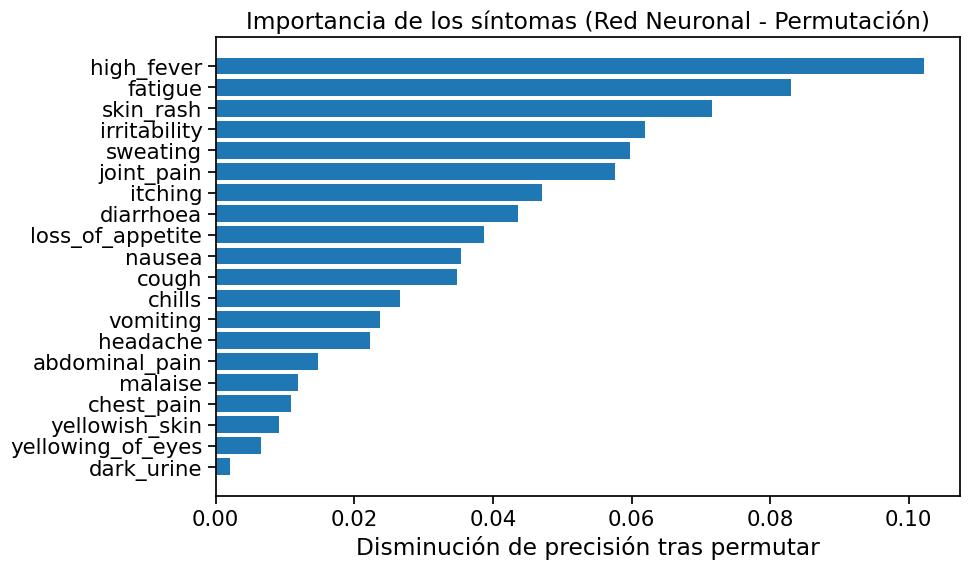

In [49]:
from sklearn.metrics import accuracy_score
import copy

def permutation_importance_nn(model, X_test, y_test, metric=accuracy_score, n_repeats=5):
    baseline = metric(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
    importancias = []
    
    for i in range(X_test.shape[1]):
        scores = []
        for _ in range(n_repeats):
            X_test_perm = X_test.copy()
            np.random.shuffle(X_test_perm[:, i])
            y_pred_perm = np.argmax(model.predict(X_test_perm), axis=1)
            score = metric(np.argmax(y_test, axis=1), y_pred_perm)
            scores.append(score)
        importance = baseline - np.mean(scores)
        importancias.append(importance)
    
    return np.array(importancias)

# Ejecutar el análisis de importancia
importancias = permutation_importance_nn(model, X_test, y_test)

# Crear DataFrame con los síntomas y sus importancias
importancia_df = pd.DataFrame({
    'sintoma': sintomas,
    'importancia': importancias
}).sort_values(by='importancia', ascending=False)

# Visualizar
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['sintoma'][::-1], importancia_df['importancia'][::-1])
plt.xlabel("Disminución de precisión tras permutar")
plt.title("Importancia de los síntomas (Red Neuronal - Permutación)")
plt.tight_layout()
plt.show()


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Entrenar el árbol con profundidad limitada para interpretabilidad
clf_tree = DecisionTreeClassifier(
    criterion='entropy',     # o 'gini'
    max_depth=7,             # profundidad inicial moderada
    random_state=42
)
clf_tree.fit(x_train, y_train)

# Evaluación rápida
y_pred = clf_tree.predict(X_test)
print("Accuracy del árbol inicial:", accuracy_score(y_test, y_pred))
# Métricas detalladas por clase
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy del árbol inicial: 0.8482202820685023
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.83      0.91        36
                                   AIDS       1.00      0.94      0.97        36
                                   Acne       0.74      0.97      0.84        36
                    Alcoholic hepatitis       1.00      0.78      0.88        37
                                Allergy       0.21      1.00      0.35        36
                              Arthritis       1.00      0.92      0.96        36
                       Bronchial Asthma       0.94      0.89      0.91        36
                   Cervical spondylosis       1.00      0.89      0.94        37
                            Chicken pox       0.88      1.00      0.94        36
                    Chronic cholestasis       0.94      0.92      0.93        36
                            Common Cold       0.59      0.95 

C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
# Copia el texto completo del classification_report como string
reporte_arbol = """
Accuracy del árbol inicial: 0.8025520483546004
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.97      0.83      0.90        36
                                   AIDS       1.00      0.94      0.97        36
                                   Acne       0.66      0.97      0.79        36
                    Alcoholic hepatitis       1.00      0.81      0.90        37
                                Allergy       1.00      0.89      0.94        36
                              Arthritis       0.18      1.00      0.30        36
                       Bronchial Asthma       1.00      0.89      0.94        36
                   Cervical spondylosis       0.00      0.00      0.00        37
                            Chicken pox       0.95      1.00      0.97        36
                    Chronic cholestasis       0.94      0.92      0.93        36
                            Common Cold       0.97      1.00      0.99        37
                                 Dengue       0.92      1.00      0.96        36
                              Diabetes        0.49      0.89      0.63        36
           Dimorphic hemmorhoids(piles)       0.00      0.00      0.00        36
                          Drug Reaction       0.47      0.73      0.57        37
                       Fungal infection       0.00      0.00      0.00        37
                                   GERD       1.00      0.78      0.88        36
                        Gastroenteritis       1.00      0.81      0.89        36
                           Heart attack       0.91      0.81      0.85        36
                            Hepatitis B       1.00      0.97      0.99        37
                            Hepatitis C       1.00      0.92      0.96        36
                            Hepatitis D       0.90      1.00      0.95        37
                            Hepatitis E       1.00      0.94      0.97        36
                          Hypertension        0.83      0.92      0.87        37
                        Hyperthyroidism       1.00      0.95      0.97        37
                           Hypoglycemia       1.00      1.00      1.00        36
                         Hypothyroidism       1.00      0.89      0.94        36
                               Impetigo       1.00      0.83      0.91        36
                               Jaundice       1.00      0.94      0.97        36
                                Malaria       0.94      0.89      0.92        37
                               Migraine       1.00      0.92      0.96        36
                        Osteoarthristis       0.97      1.00      0.99        36
           Paralysis (brain hemorrhage)       0.65      0.83      0.73        36
                    Peptic ulcer diseae       0.97      0.89      0.93        37
                              Pneumonia       0.90      0.97      0.93        36
                              Psoriasis       1.00      0.92      0.96        36
                           Tuberculosis       1.00      1.00      1.00        37
                                Typhoid       1.00      1.00      1.00        36
                Urinary tract infection       0.00      0.00      0.00        36
                         Varicose veins       0.00      0.00      0.00        37
                            hepatitis A       1.00      0.89      0.94        36

                               accuracy                           0.80      1489
                              macro avg       0.80      0.80      0.79      1489
                           weighted avg       0.80      0.80      0.79      1489
"""

# Parsear el texto del classification_report
lineas = [l for l in reporte_arbol.split('\n') if len(l.strip()) > 0 and 'accuracy' not in l and 'avg' not in l]

data = []

for linea in lineas:
    partes = linea.split()
    if len(partes) < 5:
        continue
    try:
        precision, recall, f1, support = map(float, partes[-4:])
        enfermedad = ' '.join(partes[:-4])
        data.append((enfermedad.strip(), precision, recall, f1, int(support)))
    except ValueError:
        continue

# Crear DataFrame con los resultados
import pandas as pd
df_resultados = pd.DataFrame(data, columns=['enfermedad', 'precision', 'recall', 'f1_score', 'support'])

# Filtrar enfermedades con f1-score <= 0.30
df_f1_bajo = df_resultados[df_resultados['f1_score'] <= 0.50]

# Mostrar resultado
print(df_f1_bajo)


                      enfermedad  precision  recall  f1_score  support
5                      Arthritis       0.18     1.0       0.3       36
7           Cervical spondylosis       0.00     0.0       0.0       37
13  Dimorphic hemmorhoids(piles)       0.00     0.0       0.0       36
15              Fungal infection       0.00     0.0       0.0       37
38       Urinary tract infection       0.00     0.0       0.0       36
39                Varicose veins       0.00     0.0       0.0       37


In [53]:
import pandas as pd

# Paso 1: define tu lista de enfermedades con bajo recall (por ejemplo, según el classification_report)
enfermedades_bajo_recall = [
    'Arthritis',
    'Cervical spondylosis',
    'Dimorphic hemmorhoids(piles)',
    'Fungal infection',
    'Urinary tract infection',
    'Varicose veins'
]

# Paso 2: obtener automáticamente todas las columnas de síntomas (asumiendo que la columna objetivo se llama 'prognosis')
sintomas = [col for col in df.columns if col != 'prognosis']

# Paso 3: calcular los síntomas más representativos para cada enfermedad difícil
resultados = []

for enfermedad in enfermedades_bajo_recall:
    casos = df[df['prognosis'] == enfermedad]
    freq_enf = casos[sintomas].mean()
    freq_global = df[sintomas].mean()
    diferencia = freq_enf - freq_global
    sintomas_mas_representativos = diferencia.sort_values(ascending=False).head(4)

    for sintoma, valor in sintomas_mas_representativos.items():
        resultados.append({
            'enfermedad': enfermedad,
            'sintoma': sintoma,
            'freq_enf': freq_enf[sintoma],
            'freq_global': freq_global[sintoma],
            'diferencia': valor
        })

# Paso 4: guardar o visualizar resultados
df_sintomas_ext = pd.DataFrame(resultados).sort_values(by=['enfermedad', 'diferencia'], ascending=[True, False])

# Ver los resultados
print(df_sintomas_ext)

# Opcional: exportar a Excel
df_sintomas_ext.to_excel("sintomas_diferenciadores_121.xlsx", index=False)


                      enfermedad                      sintoma  freq_enf  \
0                      Arthritis           movement_stiffness  0.950413   
1                      Arthritis              swelling_joints  0.950413   
2                      Arthritis              painful_walking  0.950413   
3                      Arthritis                   stiff_neck  0.950413   
4           Cervical spondylosis                    neck_pain  0.950413   
5           Cervical spondylosis                    dizziness  0.950413   
6           Cervical spondylosis              loss_of_balance  0.950413   
7           Cervical spondylosis            weakness_in_limbs  0.900826   
8   Dimorphic hemmorhoids(piles)          pain_in_anal_region  0.950413   
9   Dimorphic hemmorhoids(piles)                 bloody_stool  0.950413   
10  Dimorphic hemmorhoids(piles)           irritation_in_anus  0.950413   
11  Dimorphic hemmorhoids(piles)  pain_during_bowel_movements  0.950413   
12              Fungal in

PermissionError: [Errno 13] Permission denied: 'sintomas_diferenciadores_121.xlsx'

In [54]:
# Nuevos síntomas que quieres añadir (desde enfermedades mal clasificadas)
sintomas_extra = [
    'movement_stiffness',
    'neck_pain',
    'pain_in_anal_region',
    'nodal_skin_eruptions',
    'bladder_discomfort',
    'swollen_legs'
]

# Unir listas y eliminar duplicados
sintomas_ampliados = list(set(top_20_sintomas + sintomas_extra))

# Orden opcional (alfabético o por importancia si tienes ese dato)
sintomas_ampliados.sort()

# Verificar resultado
print(f"Número total de síntomas: {len(sintomas_ampliados)}")
print(sintomas_ampliados)


Número total de síntomas: 26
['abdominal_pain', 'bladder_discomfort', 'chest_pain', 'chills', 'cough', 'dark_urine', 'diarrhoea', 'fatigue', 'headache', 'high_fever', 'irritability', 'itching', 'joint_pain', 'loss_of_appetite', 'malaise', 'movement_stiffness', 'nausea', 'neck_pain', 'nodal_skin_eruptions', 'pain_in_anal_region', 'skin_rash', 'sweating', 'swollen_legs', 'vomiting', 'yellowing_of_eyes', 'yellowish_skin']


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Añadir los nuevos síntomas a los 20 ya definidos
sintomas_extra = [
    'movement_stiffness',
    'neck_pain',
    'pain_in_anal_region',
    'nodal_skin_eruptions',
    'bladder_discomfort',
    'swollen_legs'
]

# Crear lista ampliada sin duplicados
sintomas_ampliados = list(set(top_20_sintomas + sintomas_extra))

# Preparar los datos
X = df[sintomas_ampliados].astype(int).values
le = LabelEncoder()
y = le.fit_transform(df['prognosis'])

# Dividir en entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Entrenar el árbol con los síntomas ampliados
clf_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    random_state=42
)
clf_tree.fit(X_train, y_train)

# Evaluación
y_pred = clf_tree.predict(X_test)
print("Accuracy del árbol inicial:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


NameError: name 'top_20_sintomas' is not defined

In [61]:
# Copia el texto completo del classification_report como string
reporte_arbol = """
Accuracy del árbol inicial: 0.8482202820685023
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.83      0.91        36
                                   AIDS       1.00      0.94      0.97        36
                                   Acne       0.74      0.97      0.84        36
                    Alcoholic hepatitis       1.00      0.78      0.88        37
                                Allergy       0.21      1.00      0.35        36
                              Arthritis       1.00      0.92      0.96        36
                       Bronchial Asthma       0.94      0.89      0.91        36
                   Cervical spondylosis       1.00      0.89      0.94        37
                            Chicken pox       0.88      1.00      0.94        36
                    Chronic cholestasis       0.94      0.92      0.93        36
                            Common Cold       0.59      0.95      0.73        37
                                 Dengue       0.92      1.00      0.96        36
                              Diabetes        1.00      0.78      0.88        36
           Dimorphic hemmorhoids(piles)       0.00      0.00      0.00        36
                          Drug Reaction       0.90      0.73      0.81        37
                       Fungal infection       1.00      0.89      0.94        37
                                   GERD       1.00      0.78      0.88        36
                        Gastroenteritis       1.00      0.81      0.89        36
                           Heart attack       0.91      0.81      0.85        36
                            Hepatitis B       1.00      0.92      0.96        37
                            Hepatitis C       1.00      0.78      0.88        36
                            Hepatitis D       0.89      0.89      0.89        37
                            Hepatitis E       1.00      0.94      0.97        36
                          Hypertension        0.94      0.92      0.93        37
                        Hyperthyroidism       0.95      0.95      0.95        37
                           Hypoglycemia       1.00      0.86      0.93        36
                         Hypothyroidism       1.00      0.81      0.89        36
                               Impetigo       1.00      0.83      0.91        36
                               Jaundice       1.00      0.94      0.97        36
                                Malaria       0.94      0.92      0.93        37
                               Migraine       0.85      0.94      0.89        36
                        Osteoarthristis       0.94      0.92      0.93        36
           Paralysis (brain hemorrhage)       0.65      0.83      0.73        36
                    Peptic ulcer diseae       0.94      0.89      0.92        37
                              Pneumonia       1.00      0.94      0.97        36
                              Psoriasis       1.00      0.92      0.96        36
                           Tuberculosis       1.00      1.00      1.00        37
                                Typhoid       1.00      1.00      1.00        36
                Urinary tract infection       0.00      0.00      0.00        36
                         Varicose veins       1.00      0.84      0.91        37
                            hepatitis A       1.00      0.83      0.91        36

                               accuracy                           0.85      1489
                              macro avg       0.88      0.85      0.85      1489
                           weighted avg       0.88      0.85      0.85      1489
"""

# Parsear el texto del classification_report
lineas = [l for l in reporte_arbol.split('\n') if len(l.strip()) > 0 and 'accuracy' not in l and 'avg' not in l]

data = []

for linea in lineas:
    partes = linea.split()
    if len(partes) < 5:
        continue
    try:
        precision, recall, f1, support = map(float, partes[-4:])
        enfermedad = ' '.join(partes[:-4])
        data.append((enfermedad.strip(), precision, recall, f1, int(support)))
    except ValueError:
        continue

# Crear DataFrame con los resultados
import pandas as pd
df_resultados = pd.DataFrame(data, columns=['enfermedad', 'precision', 'recall', 'f1_score', 'support'])

# Filtrar enfermedades con f1-score <= 0.30
df_f1_bajo = df_resultados[df_resultados['f1_score'] <= 0.50]

# Mostrar resultado
print(df_f1_bajo)

                      enfermedad  precision  recall  f1_score  support
4                        Allergy       0.21     1.0      0.35       36
13  Dimorphic hemmorhoids(piles)       0.00     0.0      0.00       36
38       Urinary tract infection       0.00     0.0      0.00       36


In [69]:
import pandas as pd

# Paso 1: define tu lista de enfermedades con bajo recall (por ejemplo, según el classification_report)
enfermedades_bajo_recall = [
    'Allergy',
    'Dimorphic hemmorhoids(piles)',
    'Urinary tract infection'
]

# Paso 2: obtener automáticamente todas las columnas de síntomas (asumiendo que la columna objetivo se llama 'prognosis')
sintomas = [col for col in df.columns if col != 'prognosis']

# Paso 3: calcular los síntomas más representativos para cada enfermedad difícil
resultados = []

for enfermedad in enfermedades_bajo_recall:
    casos = df[df['prognosis'] == enfermedad]
    freq_enf = casos[sintomas].mean()
    freq_global = df[sintomas].mean()
    diferencia = freq_enf - freq_global
    sintomas_mas_representativos = diferencia.sort_values(ascending=False).head(10)

    for sintoma, valor in sintomas_mas_representativos.items():
        resultados.append({
            'enfermedad': enfermedad,
            'sintoma': sintoma,
            'freq_enf': freq_enf[sintoma],
            'freq_global': freq_global[sintoma],
            'diferencia': valor
        })

# Paso 4: guardar o visualizar resultados
df_sintomas_ext = pd.DataFrame(resultados).sort_values(by=['enfermedad', 'diferencia'], ascending=[True, False])

# Ver los resultados
print(df_sintomas_ext)

# Opcional: exportar a Excel
df_sintomas_ext.to_excel("sintomas_diferenciadores_121.xlsx", index=False)


                      enfermedad                      sintoma  freq_enf  \
0                        Allergy           watering_from_eyes  0.900826   
1                        Allergy                    shivering  0.900826   
2                        Allergy          continuous_sneezing  0.900826   
3                        Allergy                       chills  0.900826   
4                        Allergy               fluid_overload  0.000000   
5                        Allergy          foul_smell_of urine  0.000000   
6                        Allergy         nodal_skin_eruptions  0.000000   
7                        Allergy          dischromic _patches  0.000000   
8                        Allergy       extra_marital_contacts  0.000000   
9                        Allergy                  dehydration  0.000000   
10  Dimorphic hemmorhoids(piles)          pain_in_anal_region  0.950413   
11  Dimorphic hemmorhoids(piles)                 bloody_stool  0.950413   
12  Dimorphic hemmorhoids

PermissionError: [Errno 13] Permission denied: 'sintomas_diferenciadores_121.xlsx'

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Añadir los nuevos síntomas a los 20 ya definidos
sintomas_extra = [
    'movement_stiffness',
    'neck_pain',
    'pain_in_anal_region',
    'nodal_skin_eruptions',
    'bladder_discomfort',
    'swollen_legs',
    'watering_from_eyes',
    'irritation_in_anus',
    'continuous_feel_of_urine'
]

# Crear lista ampliada sin duplicados
sintomas_ampliados = list(set(top_20_sintomas + sintomas_extra))

# Preparar los datos
X = df[sintomas_ampliados].astype(int).values
le = LabelEncoder()
y = le.fit_transform(df['prognosis'])

# Dividir en entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Entrenar el árbol con los síntomas ampliados
clf_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    random_state=42
)
clf_tree.fit(X_train, y_train)

# Evaluación
y_pred = clf_tree.predict(X_test)
print("Accuracy del árbol inicial:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy del árbol inicial: 0.847548690396239
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.83      0.91        36
                                   AIDS       1.00      0.94      0.97        36
                                   Acne       0.74      0.97      0.84        36
                    Alcoholic hepatitis       1.00      0.78      0.88        37
                                Allergy       0.21      1.00      0.34        36
                              Arthritis       0.00      0.00      0.00        36
                       Bronchial Asthma       0.94      0.89      0.91        36
                   Cervical spondylosis       1.00      0.89      0.94        37
                            Chicken pox       0.88      1.00      0.94        36
                    Chronic cholestasis       0.94      0.92      0.93        36
                            Common Cold       0.59      0.95  

C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andre\anaconda3\envs\tfg_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Añadir los nuevos síntomas a los 20 ya definidos
sintomas_extra = [
    'movement_stiffness',
    'neck_pain',
    'pain_in_anal_region',
    'nodal_skin_eruptions',
    'bladder_discomfort',
    'swollen_legs'
]

# Crear lista ampliada sin duplicados
sintomas_ampliados = list(set(top_20_sintomas + sintomas_extra))

# Preparar los datos
X = df[sintomas_ampliados].astype(int).values
le = LabelEncoder()
y = le.fit_transform(df['prognosis'])

# Dividir en entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Entrenar el árbol con los síntomas ampliados
clf_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=9,
    random_state=42
)
clf_tree.fit(X_train, y_train)

# Evaluación
y_pred = clf_tree.predict(X_test)
print("Accuracy del árbol inicial:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy del árbol inicial: 0.9267965077233042
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.83      0.91        36
                                   AIDS       1.00      0.94      0.97        36
                                   Acne       0.74      0.97      0.84        36
                    Alcoholic hepatitis       1.00      0.81      0.90        37
                                Allergy       0.36      1.00      0.53        36
                              Arthritis       1.00      0.92      0.96        36
                       Bronchial Asthma       1.00      1.00      1.00        36
                   Cervical spondylosis       1.00      0.95      0.97        37
                            Chicken pox       1.00      1.00      1.00        36
                    Chronic cholestasis       1.00      0.92      0.96        36
                            Common Cold       0.97      1.00 

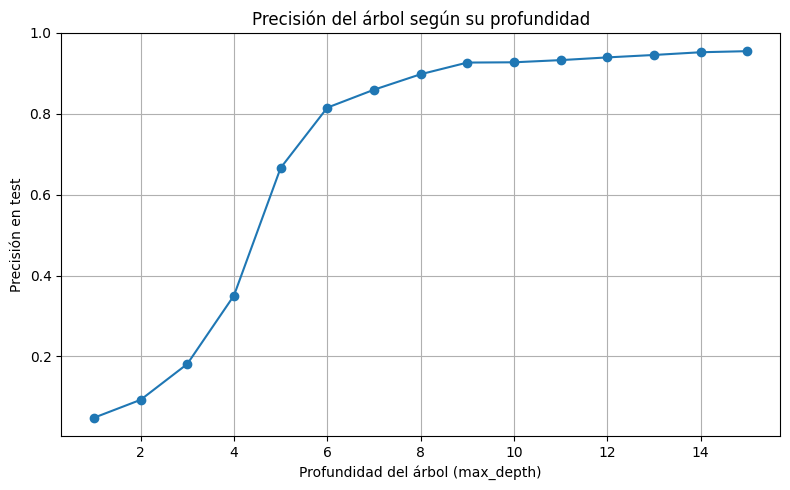


Mejor profundidad: 15.0 con precisión: 0.9550


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# 1. Lista de síntomas (ya definida)
sintomas_extra = [
    'movement_stiffness',
    'neck_pain',
    'pain_in_anal_region',
    'nodal_skin_eruptions',
    'bladder_discomfort',
    'swollen_legs'
]
sintomas_ampliados = list(set(top_20_sintomas + sintomas_extra))

# 2. Preparar los datos
X = df[sintomas_ampliados].astype(int)
le = LabelEncoder()
y = le.fit_transform(df['prognosis'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 3. Probar distintos niveles de profundidad
resultados = []

for depth in range(1, 16):  # De 1 a 15
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados.append((depth, acc))

# 4. Mostrar resultados en gráfico
df_resultados = pd.DataFrame(resultados, columns=['Profundidad', 'Precisión'])

plt.figure(figsize=(8, 5))
plt.plot(df_resultados['Profundidad'], df_resultados['Precisión'], marker='o')
plt.title("Precisión del árbol según su profundidad")
plt.xlabel("Profundidad del árbol (max_depth)")
plt.ylabel("Precisión en test")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. (Opcional) imprimir la mejor profundidad
mejor = df_resultados.loc[df_resultados['Precisión'].idxmax()]
print(f"\nMejor profundidad: {mejor['Profundidad']} con precisión: {mejor['Precisión']:.4f}")


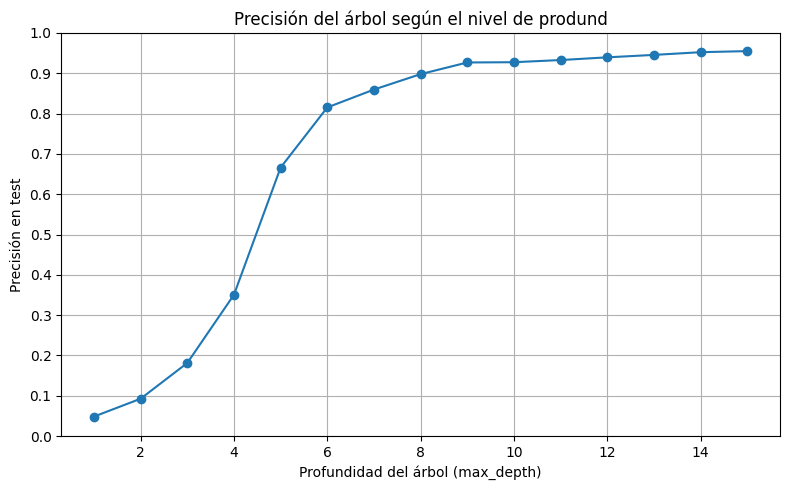

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# ... todo el código previo se mantiene igual

# Mostrar resultados en gráfico con eje Y más detallado
plt.figure(figsize=(8, 5))
plt.plot(df_resultados['Profundidad'], df_resultados['Precisión'], marker='o')
plt.title("Precisión del árbol según el nivel de prodund")
plt.xlabel("Profundidad del árbol (max_depth)")
plt.ylabel("Precisión en test")

# Eje Y: de 0.0 a 1.0 con paso de 0.1
plt.yticks(np.arange(0.0, 1.05, 0.1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
import numpy as np

mat = confusion_matrix(y_test, y_pred)
etiquetas = le.classes_
df_cm = pd.DataFrame(mat, index=etiquetas, columns=etiquetas)

# Ver las predicciones incorrectas como Allergy
fallos_allergy = df_cm['Allergy'].drop('Allergy').sort_values(ascending=False)
print("Enfermedades más confundidas como Allergy:")
print(fallos_allergy[fallos_allergy > 0])


Enfermedades más confundidas como Allergy:
Gastroenteritis         5
Diabetes                4
Varicose veins          4
Arthritis               3
Hepatitis C             3
AIDS                    2
Cervical spondylosis    2
Acne                    1
Name: Allergy, dtype: int64


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# 1. Crear la variable derivada `patron_alergia`
df['patron_alergia'] = (
    (df['continuous_sneezing'] == 1) &
    (df['itching'] == 1) &
    (df['skin_rash'] == 1) &
    (df['vomiting'] == 0) &
    (df['fatigue'] == 0) &
    (df['abdominal_pain'] == 0)
).astype(int)

# 2. Construir lista de síntomas ampliados con la nueva variable
sintomas_extra = [
    'movement_stiffness',
    'neck_pain',
    'pain_in_anal_region',
    'nodal_skin_eruptions',
    'bladder_discomfort',
    'swollen_legs',
    'patron_alergia'  # ¡nuevo!
]
sintomas_ampliados = list(set(top_20_sintomas + sintomas_extra))

# 3. Preparar los datos
X = df[sintomas_ampliados].astype(int)
le = LabelEncoder()
y = le.fit_transform(df['prognosis'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 4. Entrenar el árbol con los síntomas ampliados
clf_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=9,
    random_state=42
)
clf_tree.fit(X_train, y_train)

# 5. Evaluación
y_pred = clf_tree.predict(X_test)
print("Accuracy del árbol:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy del árbol: 0.9267965077233042

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.83      0.91        36
                                   AIDS       1.00      0.94      0.97        36
                                   Acne       0.74      0.97      0.84        36
                    Alcoholic hepatitis       1.00      0.81      0.90        37
                                Allergy       0.36      1.00      0.53        36
                              Arthritis       1.00      0.92      0.96        36
                       Bronchial Asthma       1.00      1.00      1.00        36
                   Cervical spondylosis       1.00      0.95      0.97        37
                            Chicken pox       1.00      1.00      1.00        36
                    Chronic cholestasis       1.00      0.92      0.96        36
                            Common Cold      

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# 1. Nueva variable: descarta casos que probablemente NO son alergia
df['descarta_alergia'] = (
    (df['vomiting'] == 1) |
    (df['abdominal_pain'] == 1) |
    (df['weight_loss'] == 1) |
    (df['fatigue'] == 1)
).astype(int)

# 2. Crear lista de síntomas (26 + esta nueva señal)
sintomas_extra = [
    'movement_stiffness',
    'neck_pain',
    'pain_in_anal_region',
    'nodal_skin_eruptions',
    'bladder_discomfort',
    'swollen_legs',
    'descarta_alergia'  # nuevo
]
sintomas_ampliados = list(set(top_20_sintomas + sintomas_extra))

# 3. Preparar datos
X = df[sintomas_ampliados].astype(int)
le = LabelEncoder()
y = le.fit_transform(df['prognosis'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 4. Entrenar árbol
clf_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=9,
    random_state=42
)
clf_tree.fit(X_train, y_train)

# 5. Evaluar
y_pred = clf_tree.predict(X_test)
print("Accuracy del árbol:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy del árbol: 0.9348556077904634

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.83      0.91        36
                                   AIDS       1.00      0.94      0.97        36
                                   Acne       0.74      0.97      0.84        36
                    Alcoholic hepatitis       1.00      0.86      0.93        37
                                Allergy       0.43      1.00      0.60        36
                              Arthritis       1.00      0.92      0.96        36
                       Bronchial Asthma       1.00      1.00      1.00        36
                   Cervical spondylosis       1.00      0.95      0.97        37
                            Chicken pox       1.00      1.00      1.00        36
                    Chronic cholestasis       1.00      1.00      1.00        36
                            Common Cold      

In [62]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 30))  # tamaño grande para legibilidad

plot_tree(
    clf_tree,
    feature_names=sintomas_ampliados,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=12,
    label='none'  # no mostrar gini, samples, etc.
)

plt.title("Árbol de Decisión con Solo Nombre de Enfermedad en Hojas", fontsize=18)
plt.savefig("arbol_solo_etiquetas_clase.png", dpi=300, bbox_inches='tight')
plt.close()

print("✅ Árbol exportado como 'arbol_solo_etiquetas_clase.png'")


✅ Árbol exportado como 'arbol_solo_etiquetas_clase.png'


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Leer archivos Excel
df_train = pd.read_excel("Training.xlsx")
df_test = pd.read_excel("Testing.xlsx")

# Unir los datos
df_total = pd.concat([df_train, df_test], ignore_index=True)

# Codificar prognosis como entero
le = LabelEncoder()
df_total["prognosis_encoded"] = le.fit_transform(df_total["prognosis"])

# Dividir
X = df_total.drop(columns=["prognosis", "prognosis_encoded"])
y = df_total["prognosis_encoded"]

import numpy as np
from sklearn.model_selection import train_test_split

# Si tus datos están en un DataFrame, asegúrate de convertirlos a numpy arrays
X = X.values  # matriz binaria 0/1 con 132 síntomas
y = y.values  # vector con las 41 categorías de enfermedades

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=123
)

In [22]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

class BayesianSequentialDiagnostic:
    """
    Modelo de diagnóstico bayesiano secuencial que selecciona preguntas (síntomas)
    de manera óptima para maximizar la información ganada en cada paso.
    """

    def __init__(self, X_train, y_train):
        """
        Inicializa el modelo con datos de entrenamiento.

        Args:
            X_train: Matriz de síntomas (0/1) de tamaño [n_pacientes, n_síntomas]
            y_train: Vector de enfermedades (etiquetas) de tamaño [n_pacientes]
        """
        self.X_train = X_train
        self.y_train = np.array(y_train)  # Asegurar que es un array numpy
        self.n_symptoms = X_train.shape[1]
        self.disease_labels = np.unique(y_train)
        self.n_diseases = len(self.disease_labels)

        # Mapeo de etiquetas originales a índices (0, 1, 2, ...)
        self.label_to_index = {label: i for i, label in enumerate(self.disease_labels)}
        self.index_to_label = {i: label for label, i in self.label_to_index.items()}

        # Convertir etiquetas a índices numéricos para procesamiento interno
        y_indices = np.array([self.label_to_index[label] for label in y_train])

        # Cálculo de probabilidades previas de enfermedades P(disease)
        self.disease_priors = {}
        for disease in self.disease_labels:
            self.disease_priors[disease] = np.mean(self.y_train == disease)

        # Cálculo de probabilidades condicionales P(symptom|disease)
        self.conditional_probs = {}
        for disease in self.disease_labels:
            disease_cases = X_train[self.y_train == disease]
            # Usamos suavizado de Laplace para evitar probabilidades de 0
            self.conditional_probs[disease] = (np.sum(disease_cases, axis=0) + 1) / (len(disease_cases) + 2)

    def calculate_information_gain(self, symptom_idx, remaining_symptoms, current_probs):
        """
        Calcula la ganancia de información esperada al preguntar por un síntoma específico.

        Args:
            symptom_idx: Índice del síntoma a evaluar
            remaining_symptoms: Lista de síntomas disponibles para preguntar
            current_probs: Probabilidades actuales de enfermedades

        Returns:
            Ganancia de información esperada
        """
        current_entropy = entropy(list(current_probs.values()))

        # Calcular entropía condicional esperada si preguntamos este síntoma
        # P(síntoma=1) * H(enfermedades|síntoma=1) + P(síntoma=0) * H(enfermedades|síntoma=0)
        prob_symptom_positive = sum([current_probs[d] * self.conditional_probs[d][symptom_idx]
                                    for d in self.disease_labels])

        # Calcular probabilidades posteriores si el síntoma es positivo
        positive_probs = {}
        for disease in self.disease_labels:
            numerator = self.conditional_probs[disease][symptom_idx] * current_probs[disease]
            positive_probs[disease] = numerator / prob_symptom_positive if prob_symptom_positive > 0 else 0

        # Normalizar probabilidades
        if sum(positive_probs.values()) > 0:
            normalization = sum(positive_probs.values())
            positive_probs = {d: p/normalization for d, p in positive_probs.items()}

        # Calcular probabilidades posteriores si el síntoma es negativo
        prob_symptom_negative = 1 - prob_symptom_positive
        negative_probs = {}
        for disease in self.disease_labels:
            numerator = (1 - self.conditional_probs[disease][symptom_idx]) * current_probs[disease]
            negative_probs[disease] = numerator / prob_symptom_negative if prob_symptom_negative > 0 else 0

        # Normalizar probabilidades
        if sum(negative_probs.values()) > 0:
            normalization = sum(negative_probs.values())
            negative_probs = {d: p/normalization for d, p in negative_probs.items()}

        # Calcular entropía condicional esperada
        entropy_if_positive = entropy(list(positive_probs.values())) if sum(positive_probs.values()) > 0 else 0
        entropy_if_negative = entropy(list(negative_probs.values())) if sum(negative_probs.values()) > 0 else 0
        conditional_entropy = prob_symptom_positive * entropy_if_positive + prob_symptom_negative * entropy_if_negative

        # La ganancia de información es la reducción en entropía
        information_gain = current_entropy - conditional_entropy
        return information_gain

    def select_next_symptom(self, asked_symptoms, current_probs):
        """
        Selecciona el próximo síntoma a preguntar que proporcione la mayor ganancia de información.

        Args:
            asked_symptoms: Lista de síntomas ya preguntados
            current_probs: Probabilidades actuales de enfermedades

        Returns:
            Índice del síntoma más informativo
        """
        remaining_symptoms = [i for i in range(self.n_symptoms) if i not in asked_symptoms]

        if not remaining_symptoms:
            return None

        # Calcular ganancia de información para cada síntoma restante
        info_gains = {}
        for symptom_idx in remaining_symptoms:
            info_gains[symptom_idx] = self.calculate_information_gain(
                symptom_idx,
                remaining_symptoms,
                current_probs
            )

        # Seleccionar el síntoma con la mayor ganancia de información
        best_symptom = max(info_gains, key=info_gains.get)
        return best_symptom

    def update_probabilities(self, current_probs, symptom_idx, symptom_value):
        """
        Actualiza las probabilidades de enfermedad después de recibir una respuesta
        sobre un síntoma utilizando el teorema de Bayes.

        Args:
            current_probs: Probabilidades actuales de enfermedades
            symptom_idx: Índice del síntoma preguntado
            symptom_value: Respuesta del paciente (0 o 1)

        Returns:
            Probabilidades actualizadas de enfermedades
        """
        updated_probs = {}

        # Aplicar el teorema de Bayes: P(disease|symptom) ∝ P(symptom|disease) * P(disease)
        for disease in self.disease_labels:
            if symptom_value == 1:
                likelihood = self.conditional_probs[disease][symptom_idx]
            else:
                likelihood = 1 - self.conditional_probs[disease][symptom_idx]

            updated_probs[disease] = likelihood * current_probs[disease]

        # Normalizar las probabilidades para que sumen 1
        normalization = sum(updated_probs.values())
        if normalization > 0:
            updated_probs = {d: p/normalization for d, p in updated_probs.items()}

        return updated_probs

    def diagnose(self, patient_symptoms, max_questions=20, threshold=0.9):
        """
        Diagnostica a un paciente realizando preguntas de manera secuencial.

        Args:
            patient_symptoms: Vector completo de síntomas del paciente (para simulación)
            max_questions: Número máximo de preguntas a realizar
            threshold: Umbral de probabilidad para detener el diagnóstico

        Returns:
            - Enfermedad diagnosticada
            - Probabilidad de la enfermedad diagnosticada
            - Número de preguntas realizadas
            - Lista de síntomas preguntados
        """
        # Iniciar con probabilidades previas
        current_probs = self.disease_priors.copy()
        asked_symptoms = []

        # Realizar preguntas hasta alcanzar el número máximo o la confianza deseada
        for _ in range(max_questions):
            # Seleccionar el próximo síntoma más informativo
            next_symptom = self.select_next_symptom(asked_symptoms, current_probs)

            if next_symptom is None:
                break

            # Simular la respuesta del paciente
            symptom_value = patient_symptoms[next_symptom]

            # Actualizar probabilidades con la respuesta
            current_probs = self.update_probabilities(current_probs, next_symptom, symptom_value)

            # Añadir síntoma a la lista de preguntados
            asked_symptoms.append(next_symptom)

            # Verificar si hemos alcanzado el umbral de confianza
            most_likely_disease = max(current_probs, key=current_probs.get)
            if current_probs[most_likely_disease] >= threshold:
                break

        # Obtener diagnóstico final
        diagnosed_disease = max(current_probs, key=current_probs.get)
        confidence = current_probs[diagnosed_disease]

        return diagnosed_disease, confidence, len(asked_symptoms), asked_symptoms

    def evaluate(self, X_test, y_test, max_questions=20, threshold=0.9):
        """
        Evalúa el rendimiento del modelo en un conjunto de prueba.

        Args:
            X_test: Matriz de síntomas de prueba
            y_test: Enfermedades reales de los pacientes de prueba
            max_questions: Número máximo de preguntas por paciente
            threshold: Umbral de confianza para detener el diagnóstico

        Returns:
            - Precisión del diagnóstico
            - Número promedio de preguntas realizadas
            - Lista de diagnósticos, confianzas, y número de preguntas
        """
        results = []
        n_correct = 0
        total_questions = 0

        # Convertir y_test a array numpy si no lo es
        y_test = np.array(y_test)

        for i in tqdm(range(len(X_test))):
            patient_symptoms = X_test[i]
            true_disease = y_test[i]

            # Realizar diagnóstico
            diagnosed_disease, confidence, num_questions, asked_symptoms = self.diagnose(
                patient_symptoms,
                max_questions=max_questions,
                threshold=threshold
            )

            # Registrar resultados
            is_correct = diagnosed_disease == true_disease
            if is_correct:
                n_correct += 1

            total_questions += num_questions

            results.append({
                'diagnosed_disease': diagnosed_disease,
                'true_disease': true_disease,
                'confidence': confidence,
                'num_questions': num_questions,
                'is_correct': is_correct,
                'asked_symptoms': asked_symptoms
            })

        accuracy = n_correct / len(X_test)
        avg_questions = total_questions / len(X_test)

        return accuracy, avg_questions, results

    def analyze_results(self, results):
        """
        Analiza los resultados de la evaluación del modelo.

        Args:
            results: Lista de resultados de diagnóstico

        Returns:
            DataFrame con estadísticas de rendimiento por enfermedad
        """
        # Crear DataFrame con los resultados
        df_results = pd.DataFrame(results)

        # Agrupar por enfermedad verdadera y calcular estadísticas
        stats = df_results.groupby('true_disease').agg({
            'is_correct': 'mean',
            'num_questions': 'mean',
            'confidence': 'mean'
        }).rename(columns={
            'is_correct': 'accuracy',
            'num_questions': 'avg_questions',
            'confidence': 'avg_confidence'
        })

        return stats

    def plot_symptom_importance(self, top_n=20):
        """
        Visualiza los síntomas más importantes para el diagnóstico.

        Args:
            top_n: Número de síntomas más importantes a mostrar
        """
        # Calcular la importancia de cada síntoma basada en la ganancia de información inicial
        symptom_importance = {}
        current_probs = self.disease_priors.copy()

        for symptom_idx in range(self.n_symptoms):
            symptom_importance[symptom_idx] = self.calculate_information_gain(
                symptom_idx,
                list(range(self.n_symptoms)),
                current_probs
            )

        # Crear un DataFrame con la importancia de los síntomas
        importance_df = pd.DataFrame({
            'symptom_idx': list(symptom_importance.keys()),
            'importance': list(symptom_importance.values())
        })

        # Ordenar por importancia y seleccionar los top_n
        importance_df = importance_df.sort_values('importance', ascending=False).head(top_n)

        # Visualizar
        plt.figure(figsize=(12, 8))
        sns.barplot(x='importance', y='symptom_idx', data=importance_df)
        plt.title(f'Top {top_n} síntomas más informativos')
        plt.xlabel('Ganancia de información')
        plt.ylabel('Índice del síntoma')
        plt.tight_layout()
        plt.show()

    def plot_confusion_matrix(self, results):
        """
        Visualiza la matriz de confusión del diagnóstico.

        Args:
            results: Lista de resultados de diagnóstico
        """
        # Crear DataFrame con los resultados
        df_results = pd.DataFrame(results)

        # Crear matriz de confusión
        conf_matrix = pd.crosstab(
            df_results['true_disease'],
            df_results['diagnosed_disease'],
            normalize='index'
        )

        # Visualizar
        plt.figure(figsize=(12, 10))
        sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='.2f', cbar=True)
        plt.title('Matriz de confusión normalizada')
        plt.ylabel('Enfermedad verdadera')
        plt.xlabel('Enfermedad diagnosticada')
        plt.tight_layout()
        plt.show()

    def compare_num_questions(self, max_questions_list=[5, 10, 15, 20, 25, 30], threshold=0.8):
        """
        Compara el rendimiento del modelo con diferentes números máximos de preguntas.

        Args:
            max_questions_list: Lista de diferentes números máximos de preguntas a evaluar
            threshold: Umbral de confianza para detener el diagnóstico

        Returns:
            DataFrame con resultados de rendimiento para cada número de preguntas
        """
        results = []

        for max_q in max_questions_list:
            accuracy, avg_questions, _ = self.evaluate(
                X_test,
                y_test,
                max_questions=max_q,
                threshold=threshold
            )

            results.append({
                'max_questions': max_q,
                'accuracy': accuracy,
                'avg_questions_used': avg_questions
            })

        # Crear DataFrame con resultados
        comparison_df = pd.DataFrame(results)

        # Visualizar
        fig, ax1 = plt.subplots(figsize=(10, 6))

        # Gráfico de precisión
        ax1.set_xlabel('Número máximo de preguntas')
        ax1.set_ylabel('Precisión', color='tab:blue')
        ax1.plot(comparison_df['max_questions'], comparison_df['accuracy'], 'o-', color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        # Gráfico de número promedio de preguntas
        ax2 = ax1.twinx()
        ax2.set_ylabel('Promedio de preguntas utilizadas', color='tab:red')
        ax2.plot(comparison_df['max_questions'], comparison_df['avg_questions_used'], 's-', color='tab:red')
        ax2.tick_params(axis='y', labelcolor='tab:red')

        plt.title('Comparación de rendimiento según número máximo de preguntas')
        fig.tight_layout()
        plt.show()

        return comparison_df


In [72]:
# 1. Importar la clase BayesianSequentialDiagnostic
# (copiar el código completo del archivo principal)

# 2. Inicializar y entrenar el modelo
model = BayesianSequentialDiagnostic(x_train, y_train)

# 3. Evaluar con diferentes configuraciones de preguntas
# Prueba con 10 preguntas máximo
accuracy_10, avg_questions_10, results_10 = model.evaluate(
    x_test,
    y_test,
    max_questions=10,
    threshold=0.85  # Probabilidad para considerar confiable el diagnóstico
)
print(f"Precisión con 10 preguntas máximo: {accuracy_10:.4f}")
print(f"Promedio de preguntas realizadas: {avg_questions_10:.2f}")

# Prueba con 20 preguntas máximo
accuracy_20, avg_questions_20, results_20 = model.evaluate(
    x_test,
    y_test,
    max_questions=20,
    threshold=0.85
)
print(f"\nPrecisión con 20 preguntas máximo: {accuracy_20:.4f}")
print(f"Promedio de preguntas realizadas: {avg_questions_20:.2f}")

100%|██████████████████████████████████████████████████████████████████████████████| 1489/1489 [31:40<00:00,  1.28s/it]


Precisión con 10 preguntas máximo: 0.9322
Promedio de preguntas realizadas: 6.39


100%|██████████████████████████████████████████████████████████████████████████████| 1489/1489 [36:17<00:00,  1.46s/it]


Precisión con 20 preguntas máximo: 0.9805
Promedio de preguntas realizadas: 6.77


In [75]:
# Analizar rendimiento por enfermedad
stats = model.analyze_results(results_20)

# stats viene con índice numérico; lo renombramos:
stats_named = stats.copy()
stats_named.index = stats_named.index.map(lambda idx: model.index_to_label[idx])

print("Enfermedades mejor diagnosticadas:")
print(stats_named.sort_values('accuracy', ascending=False).head(20))

print("\nEnfermedades más difíciles de diagnosticar:")
print(stats_named.sort_values('accuracy').head(20))


# --- 2. Visualizar los síntomas más informativos ---
model.plot_symptom_importance(top_n=20)

# --- 3. Comparar configuraciones de número de preguntas ---
comparison = model.compare_num_questions(
    max_questions_list=[5, 10, 15, 20, 25],
    threshold=0.85
)
# Aquí no hay índice de enfermedad, así que sale igual
print("\nComparación de configuraciones:")
print(comparison)


KeyError: '(vertigo) Paroymsal  Positional Vertigo'

100%|██████████████████████████████████████████████████████████████████████████████| 1489/1489 [40:16<00:00,  1.62s/it]


   threshold  accuracy  avg_questions
0       0.75  0.944258       6.394896
1       0.80  0.948287       6.441236
2       0.85  0.967092       6.670920
3       0.90  0.971122       6.734721
4       0.95  0.977837       6.973136
5       0.99  0.977837       7.608462


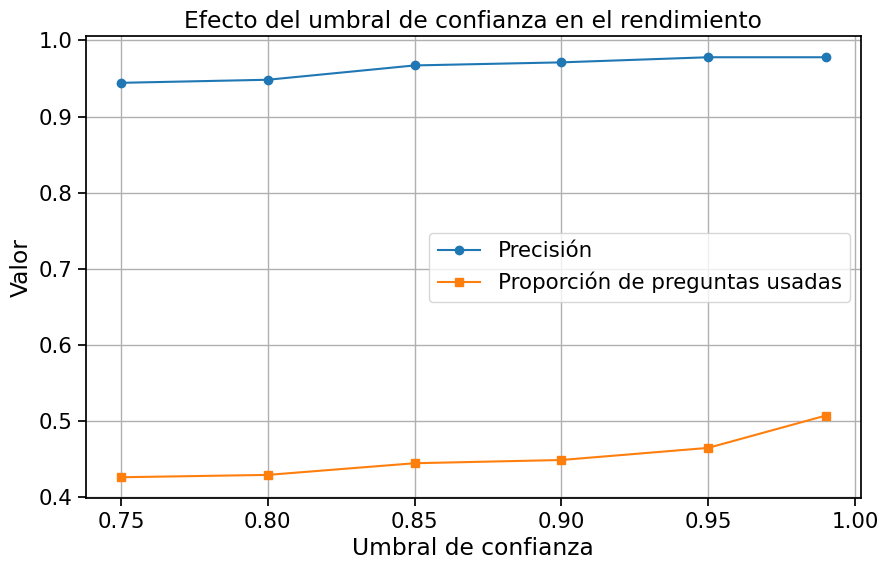

In [74]:
# Probar diferentes umbrales de confianza
thresholds = [0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
max_questions = 15

results = []
for threshold in thresholds:
    accuracy, avg_questions, _ = model.evaluate(
        x_test,
        y_test,
        max_questions=max_questions,
        threshold=threshold
    )

    results.append({
        'threshold': threshold,
        'accuracy': accuracy,
        'avg_questions': avg_questions
    })

# Crear DataFrame y visualizar
import pandas as pd
import matplotlib.pyplot as plt

df_thresholds = pd.DataFrame(results)
print(df_thresholds)

plt.figure(figsize=(10, 6))
plt.plot(df_thresholds['threshold'], df_thresholds['accuracy'], 'o-', label='Precisión')
plt.plot(df_thresholds['threshold'], df_thresholds['avg_questions'] / max_questions, 's-',
         label='Proporción de preguntas usadas')
plt.xlabel('Umbral de confianza')
plt.ylabel('Valor')
plt.legend()
plt.title('Efecto del umbral de confianza en el rendimiento')
plt.grid(True)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 1489/1489 [39:05<00:00,  1.58s/it]


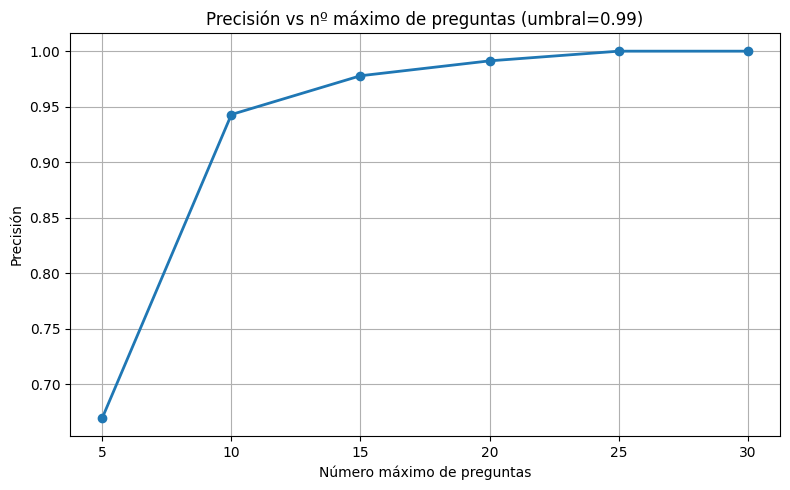

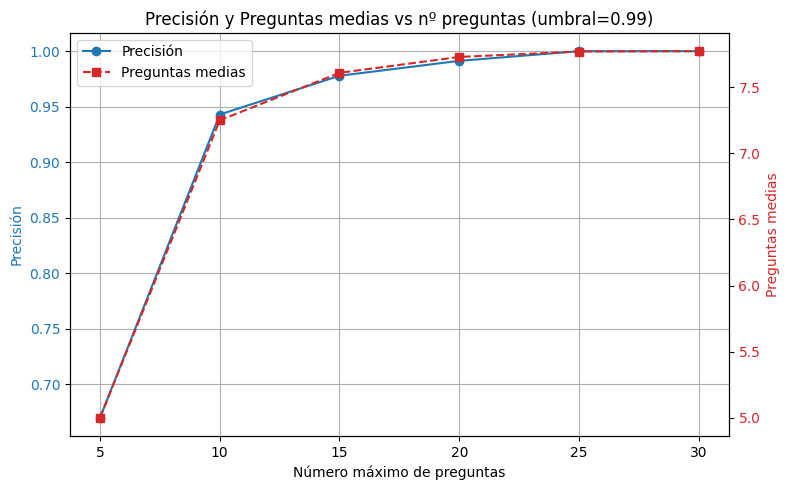

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Parámetros de la prueba ---
threshold = 0.99
max_questions_list = [5, 10, 15, 20, 25, 30]

# 2. Inicializar y entrenar el modelo
model = BayesianSequentialDiagnostic(x_train, y_train)

# --- 1. Evaluar el modelo para cada número máximo de preguntas ---
results = []
for mq in max_questions_list:
    accuracy, avg_questions, _ = model.evaluate(
        x_test, y_test,
        max_questions=mq,
        threshold=threshold
    )
    results.append({
        'max_questions': mq,
        'accuracy': accuracy,
        'avg_questions': avg_questions
    })

df_res = pd.DataFrame(results)

# --- 2. Gráfico 1: Precisión vs número de preguntas ---
plt.figure(figsize=(8, 5))
plt.plot(df_res['max_questions'], df_res['accuracy'], 'o-', linewidth=2)
plt.xlabel('Número máximo de preguntas')
plt.ylabel('Precisión')
plt.title(f'Precisión vs nº máximo de preguntas (umbral={threshold})')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 3. Gráfico 2: Doble eje (Precisión y Preguntas medias) ---
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(df_res['max_questions'], df_res['accuracy'], 'o-', color='tab:blue', label='Precisión')
ax1.set_xlabel('Número máximo de preguntas')
ax1.set_ylabel('Precisión', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(df_res['max_questions'], df_res['avg_questions'], 's--', color='tab:red', label='Preguntas medias')
ax2.set_ylabel('Preguntas medias', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Combinar leyendas
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title(f'Precisión y Preguntas medias vs nº preguntas (umbral={threshold})')
fig.tight_layout()
plt.show()
